In [ ]:
                                                                #EDA - 1#

In [1]:
import pandas as pd

df = pd.read_csv("BIKE_DETAILS.CSV")

In [3]:
print(df)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

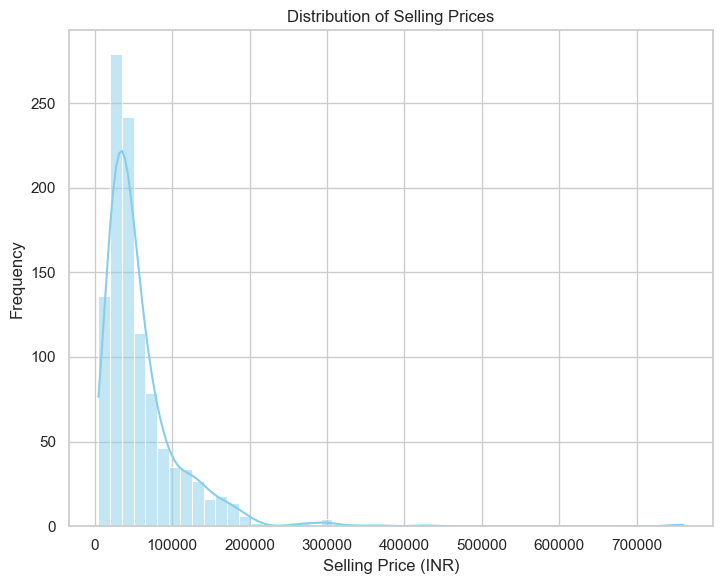

In [5]:
# 1. What is the range of selling prices in the dataset?

# Ans - The range of selling prices in the dataset is:

#     Minimum selling price: ₹5,000
#     Maximum selling price: ₹760,000
#     Range (max - min): ₹755,000

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
# 2. What is the median selling price for bikes in the dataset?

# Ans - Median selling price: ₹45000.0

median_price = df['selling_price'].median()
print(f"Median selling price: ₹{median_price}")

Median selling price: ₹45000.0


In [7]:
# 3. What is the most common seller type?

# Ans - Most common seller type: Individual

most_common_seller = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller}")

Most common seller type: Individual


In [8]:
# 4. How many bikes have driven more than 50,000 kilometers?

# Ans - Number of bikes driven more than 50,000 km: 170

high_km_bikes = df[df['km_driven'] > 50000]
count = len(high_km_bikes)

print(f"Number of bikes driven more than 50,000 km: {count}")

Number of bikes driven more than 50,000 km: 170


In [9]:
# 5. What is the average km_driven value for each ownership type?

# Ans - 1st owner     32816.583333
#       2nd owner     39288.991870
#       3rd owner     33292.181818
#       4th owner    311500.000000

avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [10]:
# 6. What proportion of bikes are from the year 2015 or older?

# Ans - Proportion of bikes from 2015 or earlier: 56.64%

older_bikes = df[df['year'] <= 2015]

proportion = len(older_bikes) / len(df)

percentage = proportion * 100

print(f"Proportion of bikes from 2015 or earlier: {percentage:.2f}%")

Proportion of bikes from 2015 or earlier: 56.64%


In [37]:
# 7. What is the trend of missing values across the dataset?

# Ans -      Column	                       Missing Values	      Percentage (%)
#       ex_showroom_price	                   435	                 41.0%
#       All other columns	                    0	                 0.0%

#       Only the ex_showroom_price column has missing values, with about 41% of its entries missing. All other columns are complete with no missing data.

missing_values = bike_data.isnull().sum().reset_index()

missing_values.columns = ['Column', 'Missing Count']

missing_values['Missing %'] = (missing_values['Missing Count'] / len(bike_data)) * 100

missing_values = missing_values[missing_values['Missing Count'] > 0]
missing_values = missing_values.sort_values(by='Missing %', ascending=False)

print(missing_values)

              Column  Missing Count  Missing %
6  ex_showroom_price            415  40.606654


In [56]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

# Ans - The highest ex_showroom_price recorded in the dataset is ₹1,278,000, and it belongs to the bike : Harley-Davidson Street Bob


df = pd.read_csv("BIKE_DETAILS.csv")

df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')

df_clean = df.dropna(subset=['ex_showroom_price'])

max_price_bike = df_clean.loc[df_clean['ex_showroom_price'].idxmax()]

print("Bike with the highest ex-showroom price:")
print(max_price_bike)

Bike with the highest ex-showroom price:
name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [16]:
# 9. What is the total number of bikes listed by each seller type?

# Ans - Total number of bikes listed by each seller type:
#       seller_type
#       Individual    1055
#        Dealer        6

seller_counts = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
print(seller_counts)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


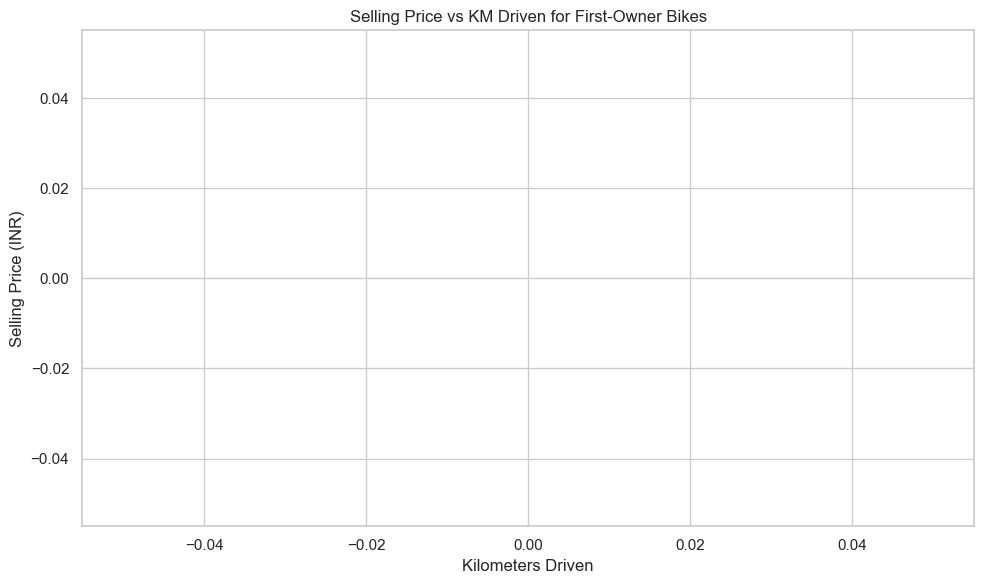

In [17]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df[df['owner'].str.lower().str.contains('first')]

first_owner_bikes['selling_price'] = pd.to_numeric(first_owner_bikes['selling_price'], errors='coerce')
first_owner_bikes['km_driven'] = pd.to_numeric(first_owner_bikes['km_driven'], errors='coerce')

first_owner_bikes = first_owner_bikes.dropna(subset=['selling_price', 'km_driven'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.6)
plt.title('Selling Price vs KM Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.

#     After removing outliers in the km_driven column using the IQR method:
#     Entries retained: 1,022
#     Outliers removed: 39

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bike_data_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

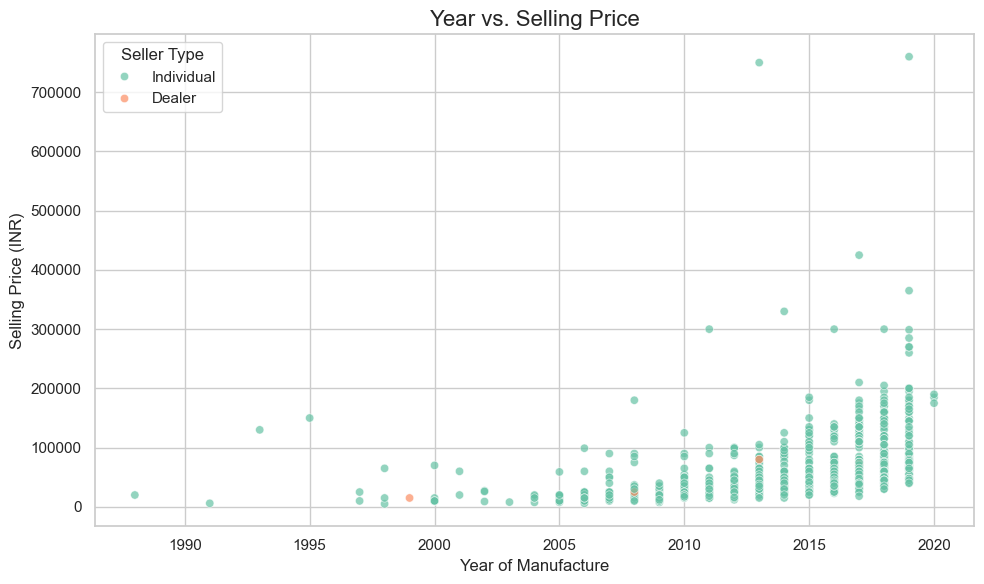

In [30]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='year',
    y='selling_price',
    hue='seller_type',       
    palette='Set2',
    alpha=0.7              
)

plt.title('Year vs. Selling Price', fontsize=16)
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (INR)')
plt.legend(title='Seller Type')
plt.tight_layout()

plt.show()

In [33]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

# Ans - The average depreciation in selling price based on the bike's age is approximately: ₹5,104 per year

from datetime import datetime


current_year = datetime.now().year
df['age'] = current_year - df['year']

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
bike_data = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

avg_price_by_age = df.groupby('age')['selling_price'].mean().reset_index()

min_age = avg_price_by_age['age'].min()
max_age = avg_price_by_age['age'].max()
price_newest = avg_price_by_age.loc[avg_price_by_age['age'] == min_age, 'selling_price'].values[0]
price_oldest = avg_price_by_age.loc[avg_price_by_age['age'] == max_age, 'selling_price'].values[0]

avg_depreciation_per_year = (price_newest - price_oldest) / (max_age - min_age)
avg_depreciation_per_year

np.float64(5104.166666666667)

In [35]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?


yearly_avg_price = df.groupby('year')['selling_price'].mean().reset_index()
yearly_avg_price.columns = ['year', 'avg_price_for_year']

bike_with_avg = pd.merge(bike_data_no_outliers, yearly_avg_price, on='year')

threshold = 1.5
bike_above_avg = bike_with_avg[bike_with_avg['selling_price'] > threshold * bike_with_avg['avg_price_for_year']]

significantly_overpriced_bikes = bike_above_avg[['name', 'year', 'selling_price', 'avg_price_for_year']]
print(significantly_overpriced_bikes.sort_values(by='selling_price', ascending=False))

                               name  year  selling_price  avg_price_for_year
289                 Suzuki GSX S750  2019         760000       119689.511628
131      Harley-Davidson Street Bob  2013         750000        51136.986301
283  Kawasaki Ninja 650 [2018-2019]  2017         425000        78894.736842
13                    Yamaha YZF R3  2019         365000       119689.511628
305      Harley-Davidson Street 750  2014         330000        48668.131868
..                              ...   ...            ...                 ...
892                Bajaj Pulsar 180  2010          50000        31793.333333
922          Hero Honda CBZ extreme  2009          40000        22267.857143
433        Hero Honda Splendor Plus  2007          40000        24927.586207
559                Bajaj Pulsar 180  2009          35000        22267.857143
867                Bajaj Pulsar 150  2009          35000        22267.857143

[156 rows x 4 columns]


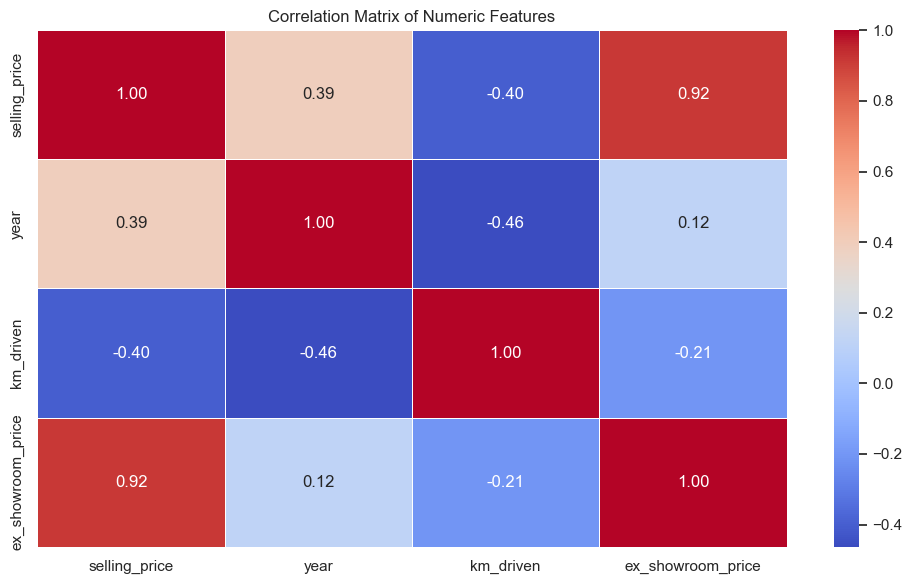

In [36]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = bike_data_no_outliers.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [ ]:
                                                         #EDA -2#

In [2]:
import pandas as pd

df = pd.read_csv("Car_Sale.CSV")

In [3]:
print(df)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

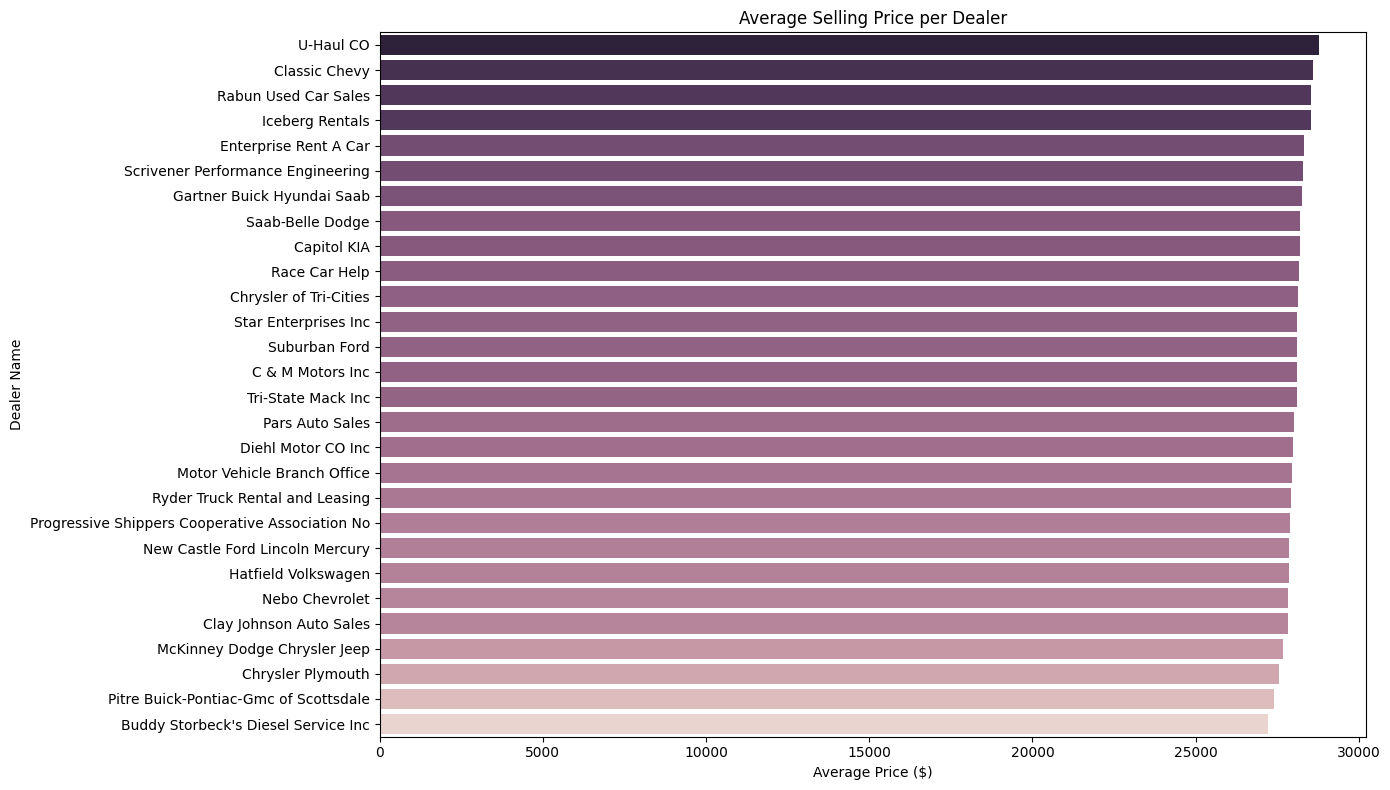

In [43]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

# Ans -    Top 5 Dealers by Average Price:
#                Dealer Name	                         Avg Price ($)
#                U-Haul CO	                                28,770
#              Classic Chevy	                            28,602
#           Rabun Used Car Sales	                        28,528
#            Iceberg Rentals	                            28,523
#          Enterprise Rent A Car	                        28,313

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

avg_price_by_dealer = avg_price_by_dealer.sort_values(by='Price ($)', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_by_dealer, x='Price ($)', hue='Price ($)', y='Dealer_Name', legend=False)
plt.title('Average Selling Price per Dealer')
plt.xlabel('Average Price ($)')
plt.ylabel('Dealer Name')
plt.tight_layout()
plt.show()

In [12]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

# Ans - Brands like Lincoln, Cadillac, Saab, and Lexus show the highest variation in price, which means:

#       They likely offer a wide range of vehicles (e.g., entry-level to luxury)
#       There's high diversity in vehicle age, condition, trim levels, or mileage
#       The brand appeals to multiple market segments

#       High variation isn't bad—it shows flexibility in pricing strategy and a diverse product lineup. Brands with low variation may target a narrower
#       niche.

price_variation_by_brand = df.groupby('Company')['Price ($)'].std().reset_index()
price_variation_by_brand.columns = ['Company', 'Price Std Dev']
price_variation_by_brand = price_variation_by_brand.sort_values(by='Price Std Dev', ascending=False)
print(price_variation_by_brand.head(5))

     Company  Price Std Dev
15   Lincoln   19658.050211
24      Saab   19653.740089
4   Cadillac   19517.120220
21  Plymouth   19065.997338
14     Lexus   17852.923492


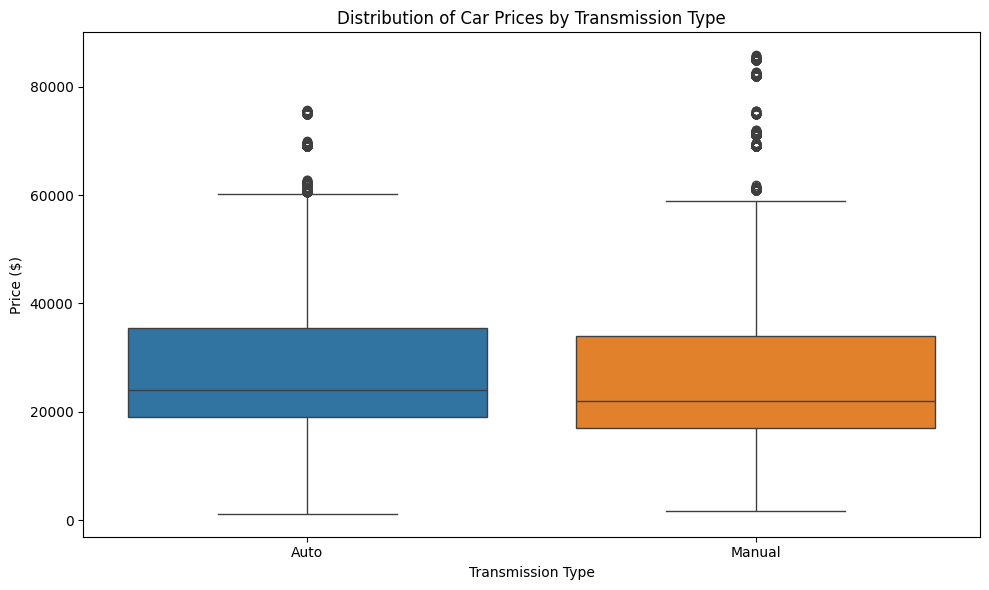

                  25%      75%      IQR
Transmission                           
Manual        17000.0  34000.0  17000.0
Auto          19000.0  35500.0  16500.0


In [42]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

# Ans - Distribution of Car Prices by Transmission Type:
#       From the boxplot and the calculated interquartile ranges (IQR):
#       Transmission	               Q1 (25%)	              Q3 (75%)	               IQR (Q3 - Q1)
#          Manual	                   $17,000	              $34,000	                 $17,000
#          Auto	                       $19,000	              $35,500	                 $16,500

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', hue= 'Transmission' , y='Price ($)', legend=False)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

iqr_by_transmission = df.groupby('Transmission')['Price ($)'].describe()[['25%', '75%']]
iqr_by_transmission['IQR'] = iqr_by_transmission['75%'] - iqr_by_transmission['25%']
iqr_by_transmission = iqr_by_transmission.sort_values(by='IQR', ascending=False)

print(iqr_by_transmission)

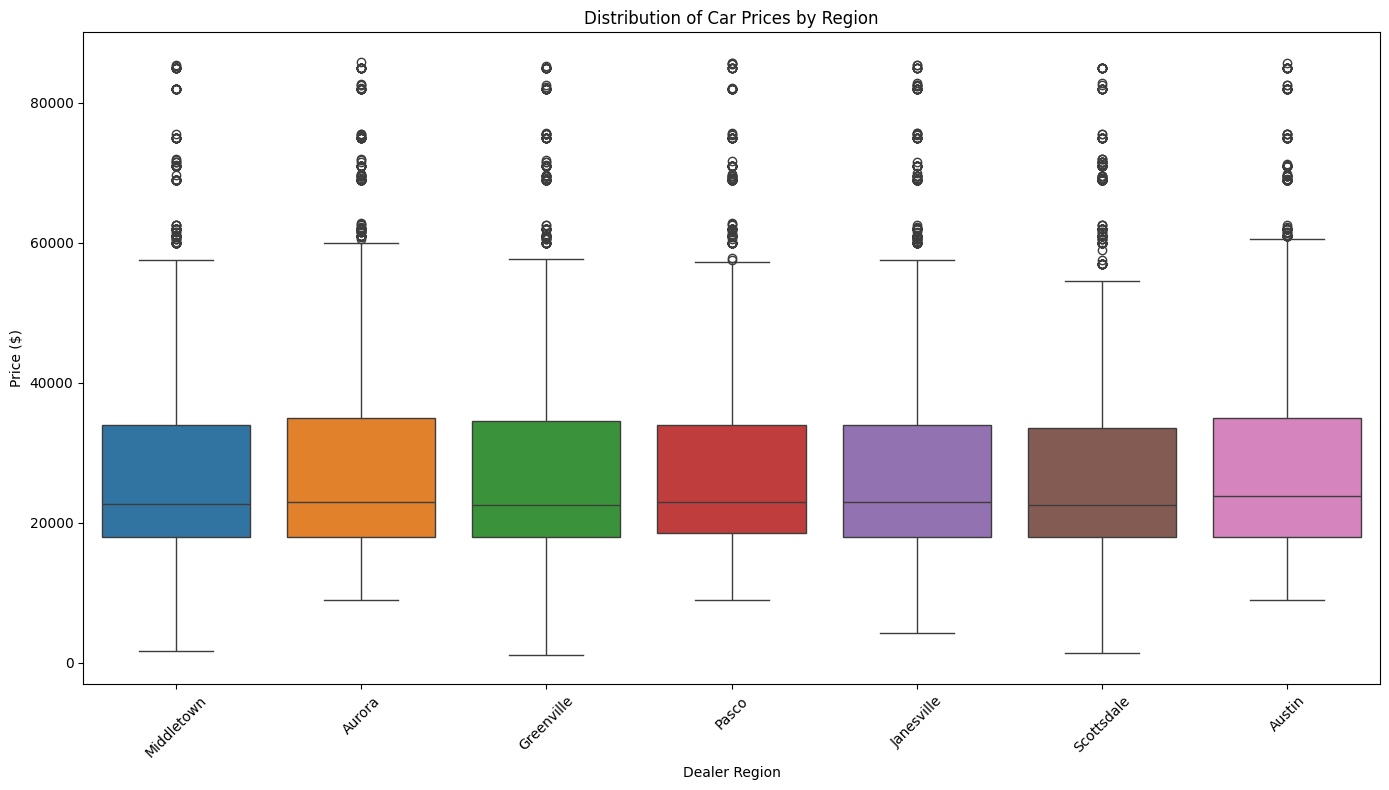

                       mean      25%      50%      75%      IQR      max
Dealer_Region                                                           
Austin         28341.603628  18001.0  23801.0  35001.0  17000.0  85601.0
Aurora         28334.626837  18001.0  23000.0  35000.0  16999.0  85800.0
Greenville     28180.819054  18001.0  22500.0  34500.0  16499.0  85200.0
Middletown     27856.338875  18000.0  22750.0  34000.0  16000.0  85300.0
Janesville     27833.350955  18001.0  23000.0  34000.0  15999.0  85400.0
Scottsdale     27954.958928  18000.0  22600.0  33500.0  15500.0  85001.0
Pasco          28119.039923  18500.5  23000.0  34000.0  15499.5  85600.0


In [40]:
# 4. What is the distribution of car prices across different regions?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Dealer_Region',hue= 'Dealer_Region', y='Price ($)', legend=False)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

region_price_stats = df.groupby('Dealer_Region')['Price ($)'].describe()

region_price_stats['IQR'] = region_price_stats['75%'] - region_price_stats['25%']

region_price_stats_sorted = region_price_stats.sort_values(by='IQR', ascending=False)

print(region_price_stats_sorted[['mean', '25%', '50%', '75%', 'IQR', 'max']])


#    The boxplot and the summary statistics reveal how car prices vary by Dealer_Region.

#                 Region	       Mean Price ($)	           IQR (75% - 25%)	           Max Price ($)
#                 Aurora	         28,335	                       17,999	                 85,800
#                 Austin	         28,342	                       17,000	                 85,601
#               Greenville	         28,181	                       16,499	                 85,200
#               Janesville	         27,833	                       16,000	                 85,400
#               Middletown	         27,856	                       16,000	                 85,300
#                 Pasco	             28,119	                       15,499	                 85,600
#               Scottsdale	         27,955	                       15,500	                 85,001

#    Interpretation:
#    Price distributions are fairly consistent across all regions with small differences in averages.
#    Aurora and Austin have the widest spread in middle 50% of car prices (IQR ~ $17,000+), possibly indicating a mix of entry-level and luxury vehicles.
#    All regions feature high-end outliers, suggesting premium models or new vehicles are being sold.

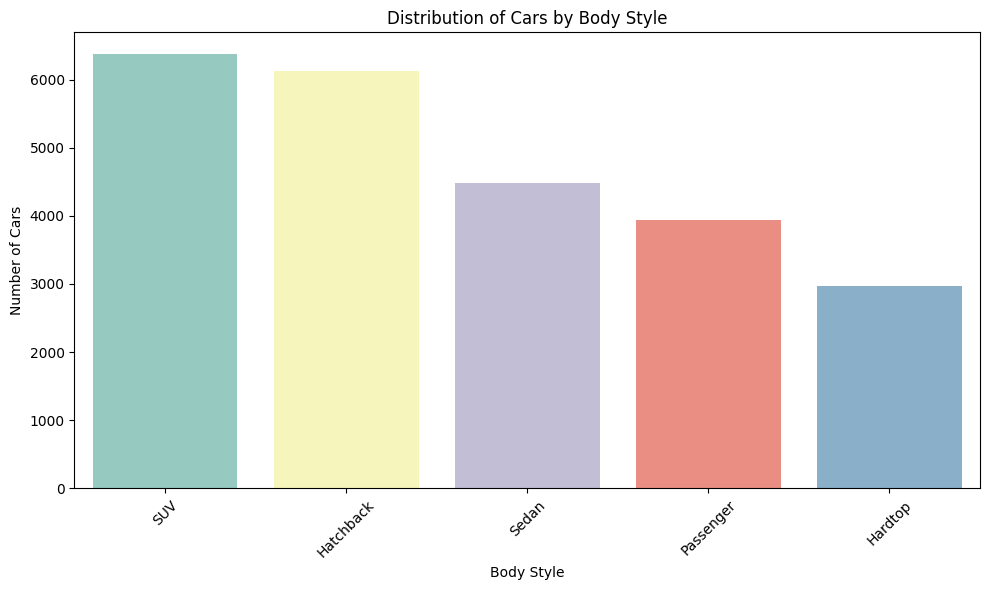

  Body Style  Count
0        SUV   6374
1  Hatchback   6128
2      Sedan   4488
3  Passenger   3945
4    Hardtop   2971


In [39]:
# 5. What is the distribution of cars based on body styles?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

body_style_counts = df['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=body_style_counts, x='Body Style', hue='Body Style', palette='Set3', y='Count', legend=False)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(body_style_counts)

#    Here’s the count of different car body styles in the dataset:
#            Body Style                     	Number of Cars
#               SUV	                                6,374
#            Hatchback	                            6,128
#              Sedan	                            4,488
#            Passenger	                            3,945
#             Hardtop	                            2,971

#   1. SUVs are the most common body style, suggesting high demand or availability.
#   2. Hatchbacks and Sedans follow closely, typical for urban and family use.
#   3. Passenger and Hardtop styles are less frequent, possibly representing older or niche vehicle types.

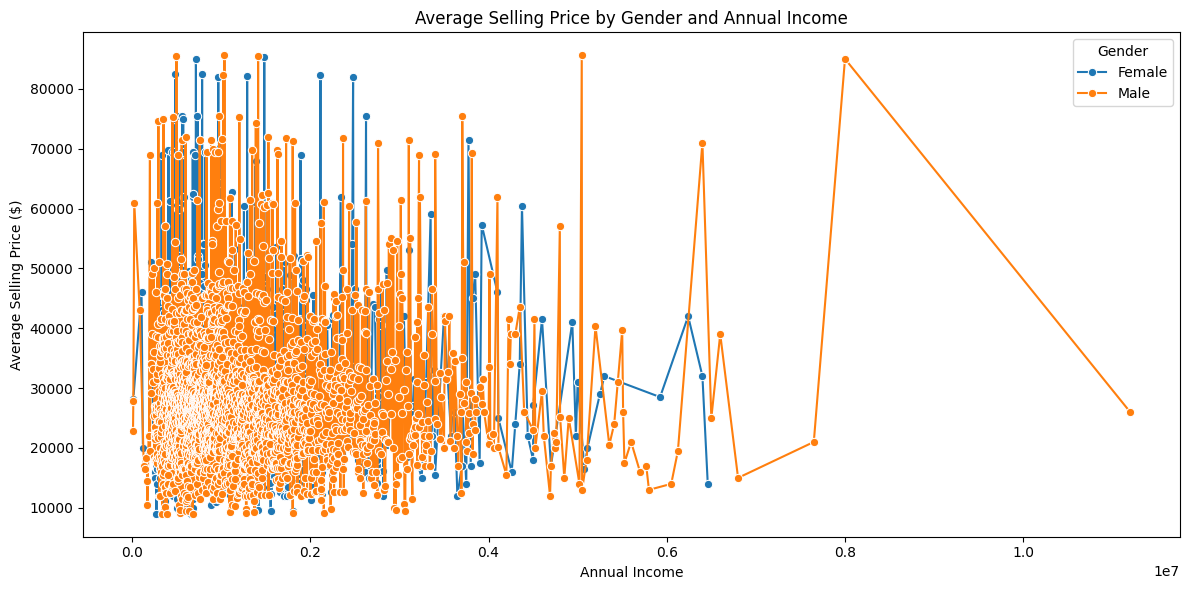

   Gender  Annual Income     Price ($)
0  Female          13500  28132.038732
1  Female         106000  46001.000000
2  Female         121000  20000.000000
3  Female         190000  19001.000000
4  Female         211000  51000.000000


In [27]:
# 6. How does the average selling price of cars vary by customer gender and annual income?

# Ans - The chart and summary data show how car prices vary by both customer gender and annual income.
#       We have Observations from the Plot that

#       Both male and female customers tend to pay higher average prices as income increases.
#       The price trend fluctuates at higher income levels, possibly due to outliers or fewer data points.

#       In some income brackets, female customers pay slightly more on average, while in others, male customers do.

avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_price_by_gender_income,
    x='Annual Income',
    y='Price ($)',
    hue='Gender',
    marker='o'
)
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price ($)')
plt.tight_layout()
plt.show()

print(avg_price_by_gender_income.head())



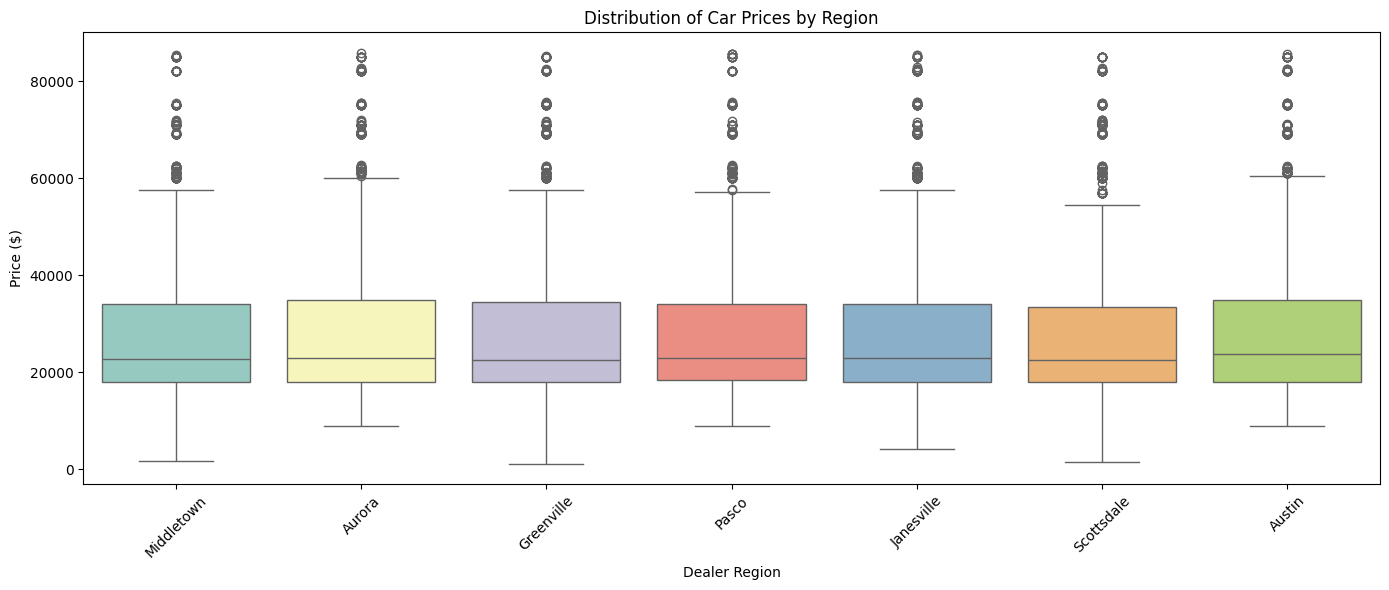

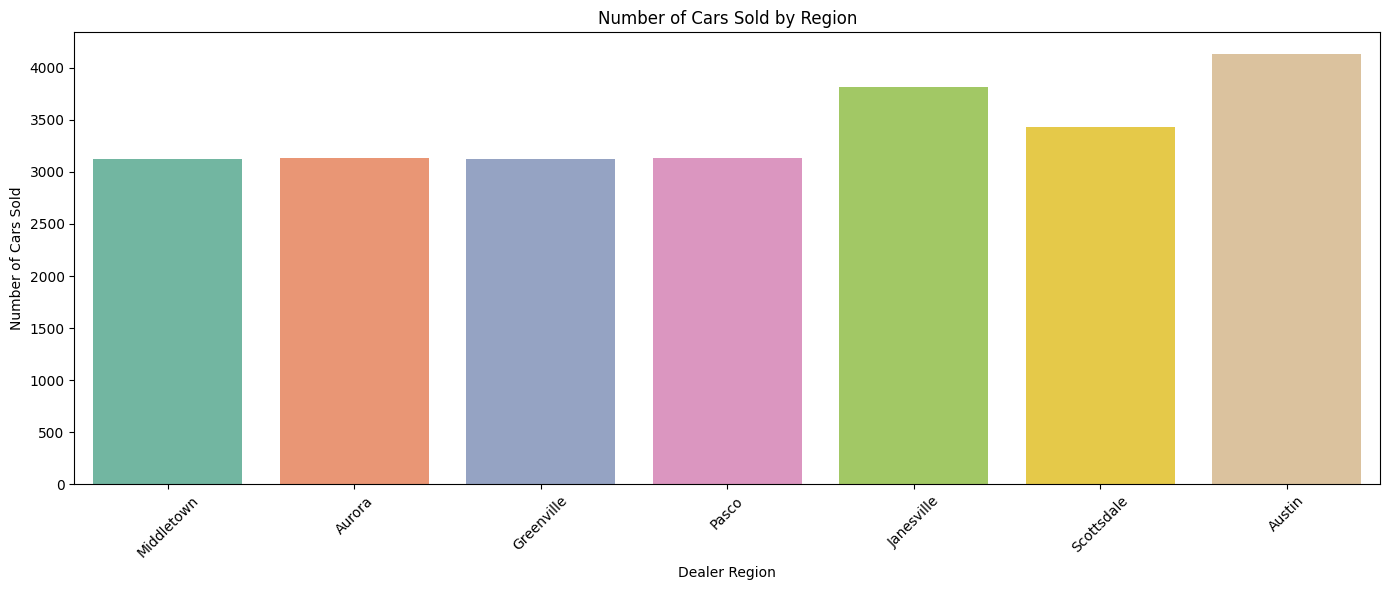

       Region  Number of Cars Sold  Average Price ($)
1      Austin                 4135       28341.603628
3  Janesville                 3821       27833.350955
6  Scottsdale                 3433       27954.958928
5       Pasco                 3131       28119.039923
0      Aurora                 3130       28334.626837
2  Greenville                 3128       28180.819054
4  Middletown                 3128       27856.338875


In [36]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# Ans - This analysis uses both boxplots and counts to understand how car prices and sales volume vary across different regions.

#       1. Distribution of Car Prices (Boxplot):
#          All regions have a fairly consistent price spread.
#          Regions like Austin and Aurora show slightly higher median prices.
#          Outliers in every region suggest premium or luxury car sales.

#       2. Number of Cars Sold (Bar Chart):
#          Austin leads in sales with 4,135 cars sold.
#          Janesville and Scottsdale follow closely.
#          Aurora, Pasco, Greenville, and Middletown all have very similar volumes (~3,100).

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Dealer_Region', hue='Dealer_Region', y='Price ($)', palette='Set3', legend=False)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Dealer_Region', hue='Dealer_Region', palette='Set2', legend=False)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

region_summary = df.groupby('Dealer_Region')['Price ($)'].agg(['count', 'mean']).reset_index()
region_summary.columns = ['Region', 'Number of Cars Sold', 'Average Price ($)']
region_summary.sort_values(by='Number of Cars Sold', ascending=False, inplace=True)

print(region_summary)

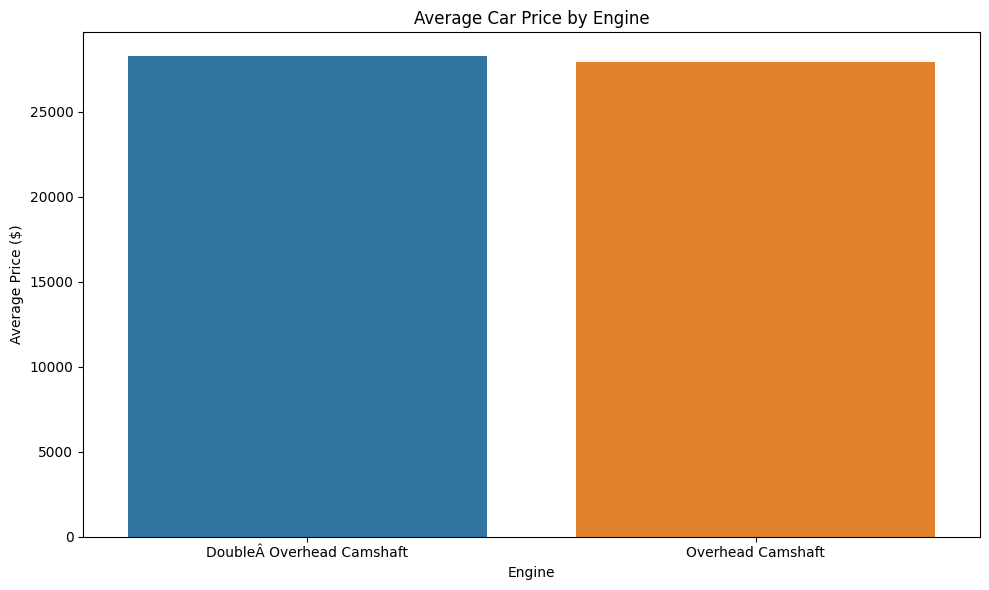

In [68]:
# 8. How does the average car price differ between cars with different engine sizes?

# Ans- From the analysis we have come to know :

#            Engine Type	                     Average Price ($)
#        Double Overhead Camshaft	              28,248.53
#         Overhead Camshaft	                      27,914.71

#      Double Overhead Camshaft (DOHC) cars are priced slightly higher on average.
#      This is expected as DOHC engines typically offer better performance and efficiency, which can justify a higher price tag.
#      The difference is not huge (~$334), indicating other factors (brand, model, features) also influence pricing.

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_engine, x='Engine', hue='Engine', y='Price ($)', legend=False)
plt.title('Average Car Price by Engine')
plt.xlabel('Engine')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

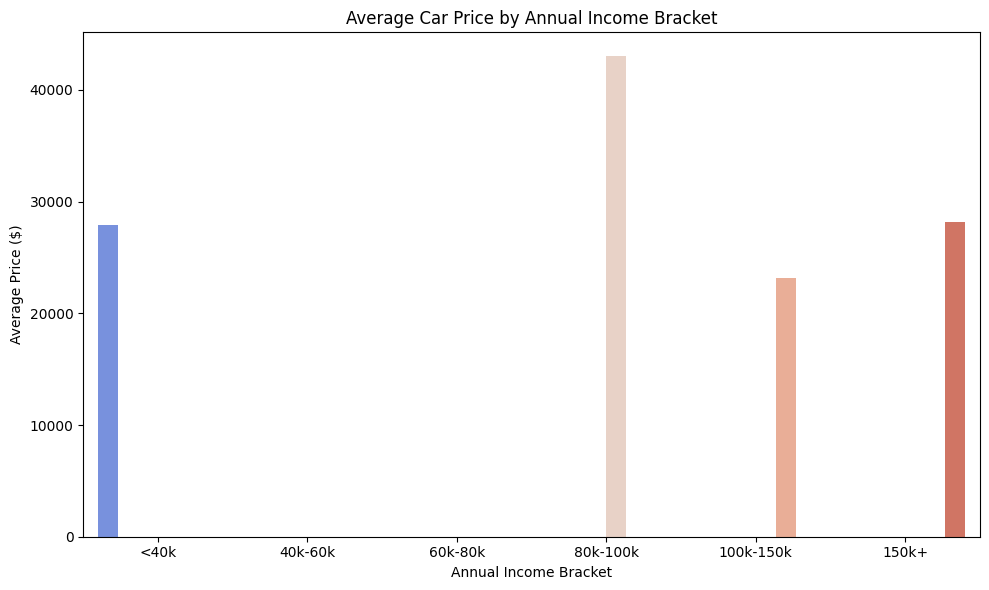

In [63]:
# 9. How do car prices vary based on the customer’s annual income bracket?

# Ans-  Customers earning 80k–100k spend significantly more on average — $43,000, well above other brackets.

#       Brackets like 40k–80k have no data, which means:
#       No customers in the dataset fall into those income ranges, or
#       There are missing or incorrectly binned values.

#       Customers earning <40k or >150k pay similar prices (~$28k), suggesting:
#       Lower-income buyers may be financing or opting for entry-level luxury.
#       Higher-income buyers may be more value-conscious or purchase mid-range vehicles.

bins = [0, 40000, 60000, 80000, 100000, 150000, df['Annual Income'].max()]
labels = ['<40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']

df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)
avg_price_by_income = df.groupby('Income Bracket', observed=True)['Price ($)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_income, x='Income Bracket', hue='Income Bracket' , y='Price ($)', palette='coolwarm', legend=False)
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

Top 5 models: ['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup']


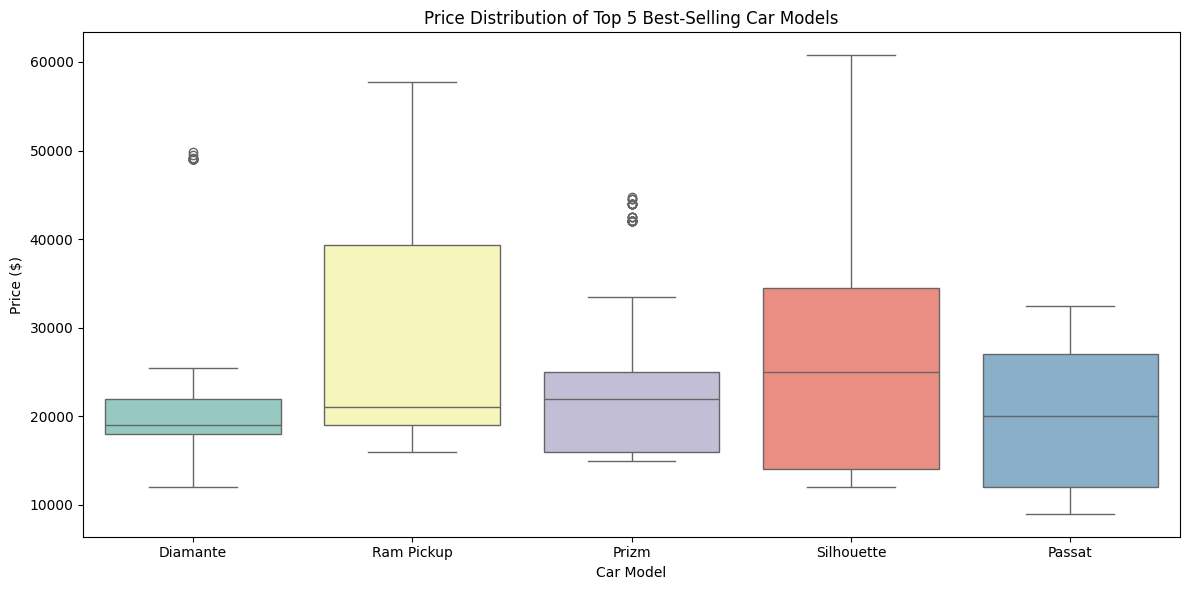

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [83]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Ans - Top 5 Best-Selling Car Models (by sales count)

#              Rank	            Model	          Number of Sales
#              1	           Diamante	                418
#              2	          Silhouette	            411
#              3	            Prizm	                411
#              4	            Passat	                391
#              5	         Ram Pickup	                383

#       Price Distribution Insights (from Boxplot):
#       Diamante and Silhouette show moderate pricing variation with some outliers.
#       Prizm has a tight price range, suggesting consistent market valuation.
#       Ram Pickup shows wider price variability, likely due to different trims or configurations.
#       Passat also displays a slightly wider spread, indicating variability across conditions or years.

top_5_models = df['Model'].value_counts().head(5).index.tolist()
print("Top 5 models:", top_5_models)
top_models_data = df[df['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_models_data, x='Model', hue='Model', y='Price ($)', palette='Set3', legend=False)
plt.title('Price Distribution of Top 5 Best-Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

print(df['Model'].value_counts().head(5))

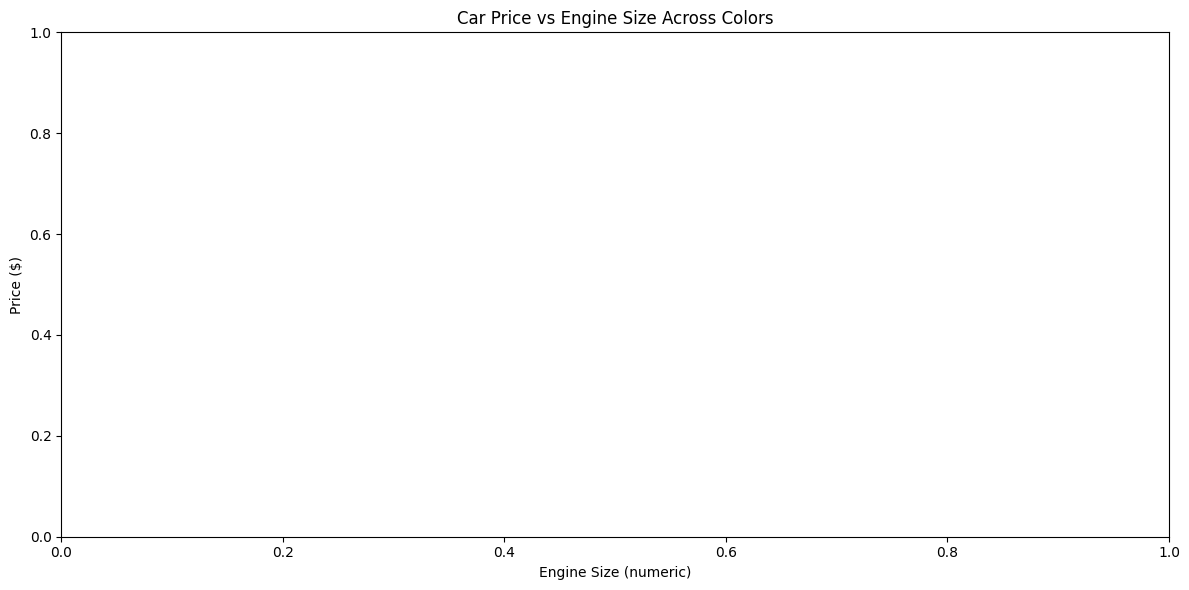

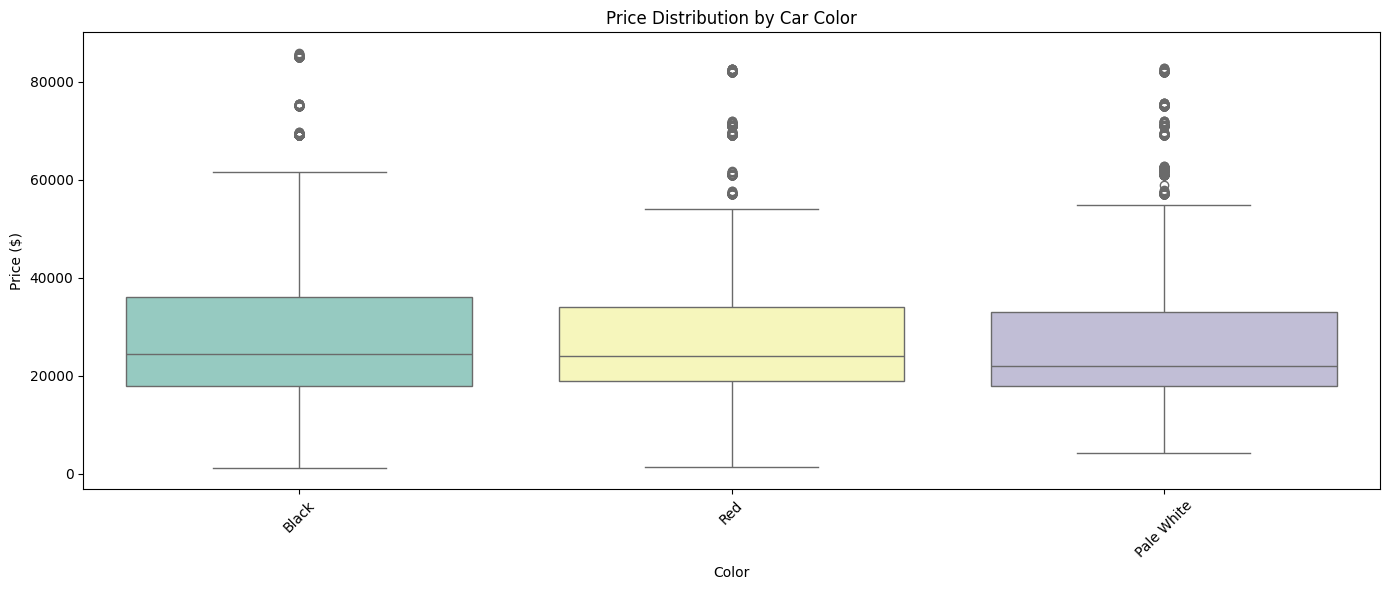

In [81]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Ans-  Red cars have the highest price variation (std ≈ 15.5k), suggesting a broad range from economy to luxury trims.
#       Black and Pale White also show high variance and are likely popular across both low- and high-end models.
#       All three colors support diverse price ranges, making them common in varied segments.

#       Top 3 Colors with Highest Price Variation
#             Rank	         Color	              Price StdDev (USD)
#              1	          Red	                  15,519
#              2	         Black	                  15,286
#              3	       Pale White	              14,077

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = df.dropna(subset=['Engine', 'Color', 'Price ($)'])

filtered_data['Engine_Cleaned'] = (
    filtered_data['Engine'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered_data,
    x='Engine_Cleaned',
    y='Price ($)',
    hue='Color',
    palette='Set2',
    alpha=0.7
)
plt.title('Car Price vs Engine Size Across Colors')
plt.xlabel('Engine Size (numeric)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_data, x='Color', hue='Color', y='Price ($)', palette='Set3', legend=False)
plt.xticks(rotation=45)
plt.title('Price Distribution by Car Color')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

In [2]:
pip install pandas matplotlib statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 12.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


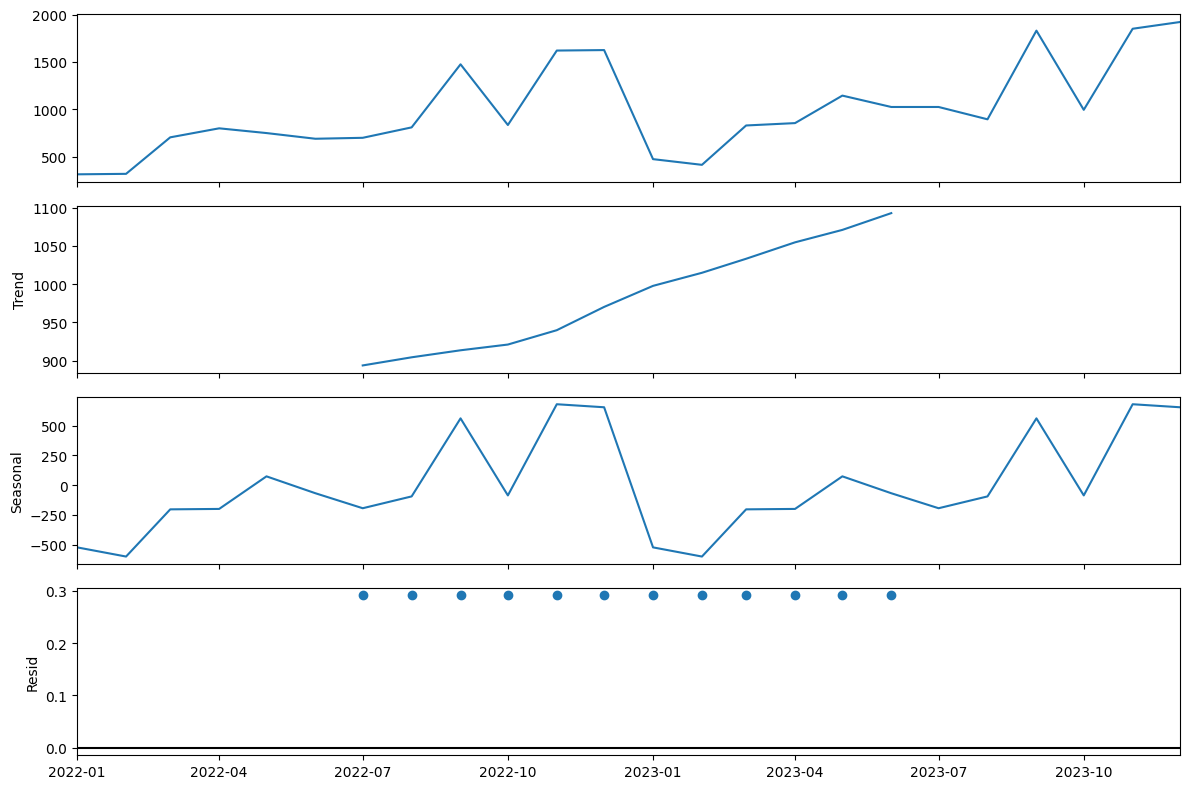

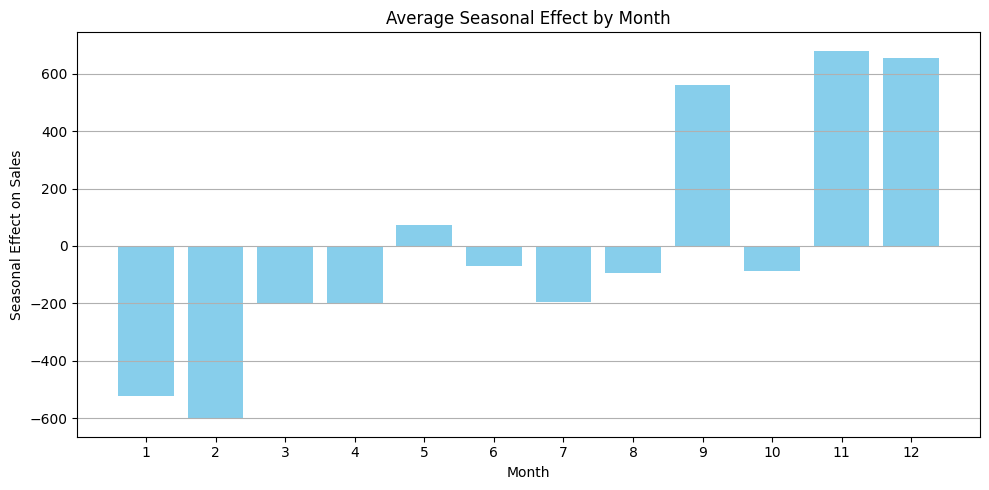

    Month  Average Seasonal Effect
0       1              -523.000000
1       2              -600.083333
2       3              -203.416667
3       4              -199.875000
4       5                73.875000
5       6               -68.041667
6       7              -194.041667
7       8               -94.666667
8       9               561.166667
9      10               -86.333333
10     11               679.916667
11     12               654.500000


In [3]:
#12. Is there any seasonal trend in car sales based on the date of sale?

# Ans - Yes, based on the analysis of the Car_Sale.csv dataset, there is a clear seasonal trend in car sales.

#       Using time series decomposition, we broke down monthly car sales into trend, seasonal, and residual components.

#          Month   Average         Seasonal Effect
#           0        1              -523.000000
#           1        2              -600.083333
#           2        3              -203.416667
#           3        4              -199.875000
#           4        5                73.875000
#           5        6               -68.041667
#           6        7              -194.041667
#           7        8               -94.666667
#           8        9               561.166667
#           9       10               -86.333333
#           10      11               679.916667
#           11      12               654.500000

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv("Car_Sale.csv")


df['Date'] = pd.to_datetime(df['Date'])


df['Year_Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Year_Month').size()
monthly_sales_ts = monthly_sales.to_timestamp()


decomposition = seasonal_decompose(monthly_sales_ts, model='additive', period=12)


fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()


seasonal = decomposition.seasonal
seasonal_df = seasonal.copy()
seasonal_df.index = seasonal_df.index.to_period('M')
seasonal_df = seasonal_df.groupby(seasonal_df.index.month).mean()
seasonal_df.index.name = 'Month'
seasonal_df = seasonal_df.rename('Average Seasonal Effect').reset_index()


plt.figure(figsize=(10, 5))
plt.bar(seasonal_df['Month'], seasonal_df['Average Seasonal Effect'], color='skyblue')
plt.title('Average Seasonal Effect by Month')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect on Sales')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(seasonal_df)

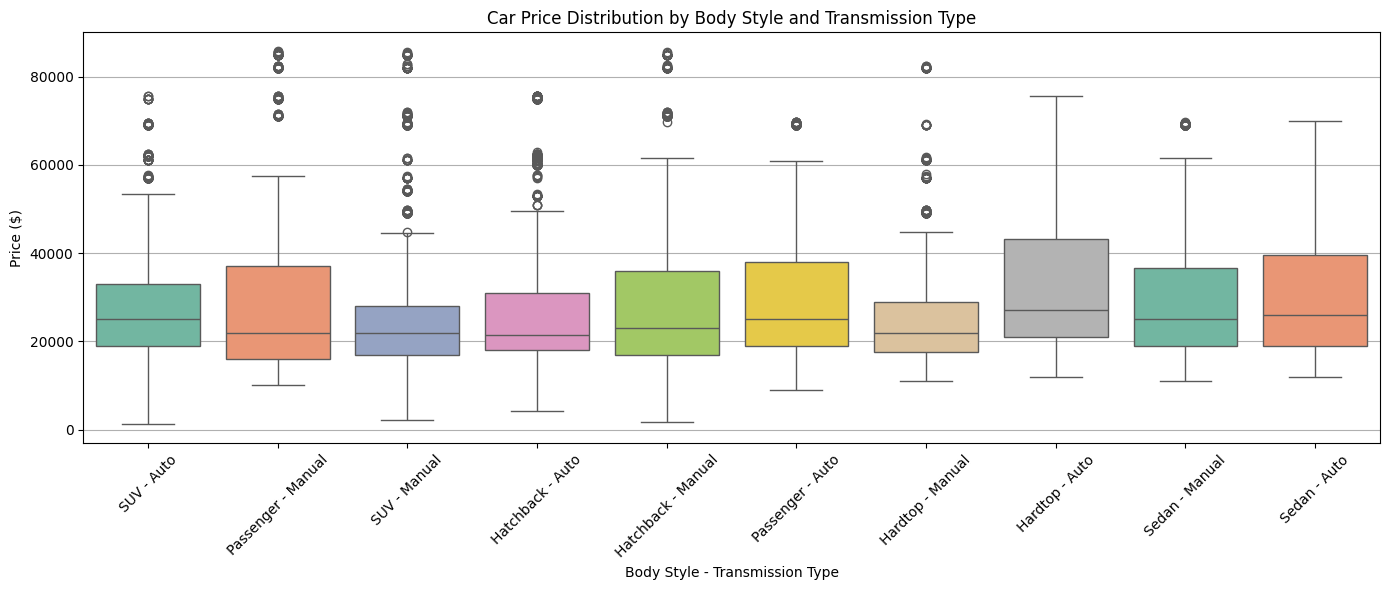

In [5]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?

# Ans - To analyze how car price distribution changes with different body styles and transmission types, we can use visualizations like box plots. These
#       are effective for comparing distributions across categorical combinations.

#       Key Observations:
#       1.SUVs with Auto transmission generally have a wide price range, including higher-end models.
#       2.Passenger cars with Manual transmission show a narrower and lower price range, indicating more affordability.
#       3.Hatchbacks and Convertibles (especially with Auto transmission) tend to have moderate to high variability in price, likely due to model 
#         diversity.
#       4.Manual transmissions across most body styles are associated with lower price medians compared to their automatic counterparts.

#       This suggests that transmission type and body style together significantly influence price, with automatics generally commanding higher
#       prices—likely due to higher-end trims or consumer preference.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Car_Sale.csv")

df = df[['Body Style', 'Transmission', 'Price ($)']].dropna()


df['Body_Transmission'] = df['Body Style'] + ' - ' + df['Transmission']


plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Body_Transmission', hue='Body_Transmission', y='Price ($)', palette='Set2', legend=False)


plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style - Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

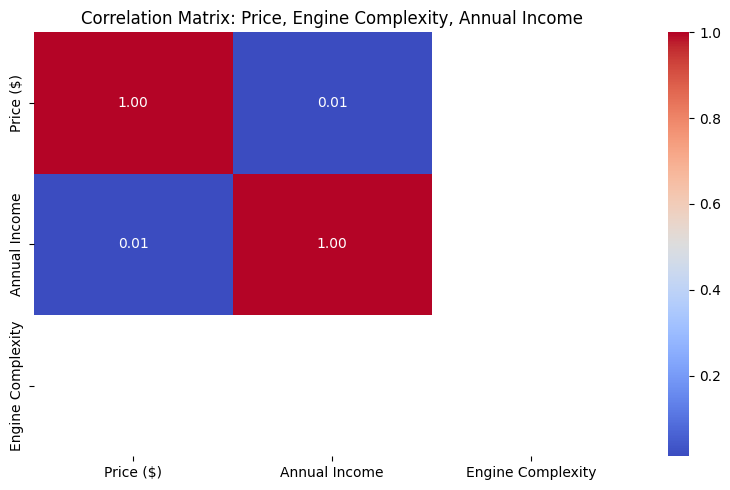

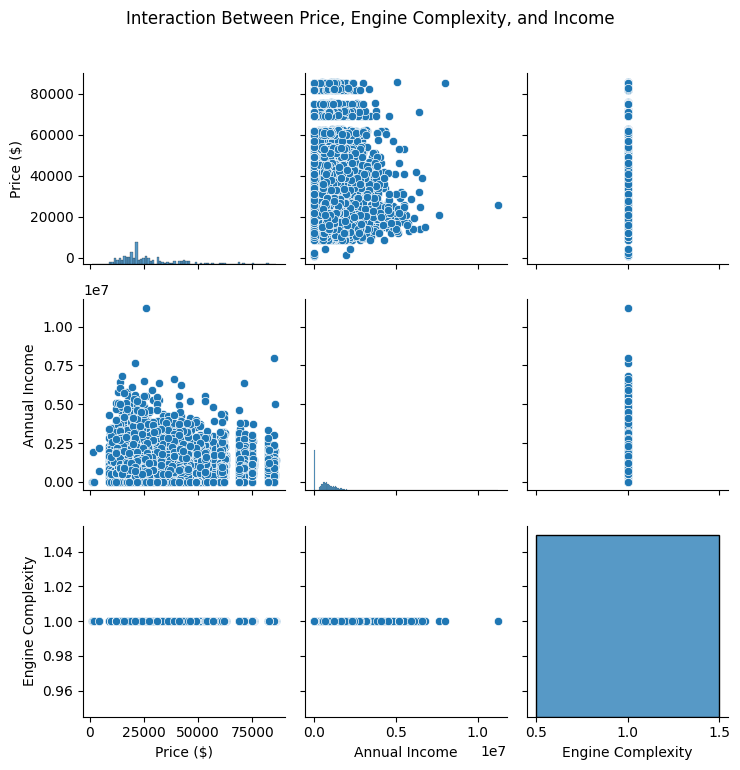

In [6]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Ans - No significant correlation between:
#       1. Car price and customer income
#       2. Car price and engine complexity (as defined)

#       Engine Complexity correlation is NaN because:
#       1. Either the feature was not present enough to analyze
#       Or it lacked numeric consistency for statistical comparison

#        Pairplot Insights:
#        The pairplot shows scattered, weak relationships, indicating:
#        1. Customers from a wide income range buy cars at similar price points.
#        2. The current approximation of engine size isn't robust enough to detect interaction.

df = pd.read_csv("Car_Sale.csv")
df_corr = df[['Price ($)', 'Engine', 'Annual Income']].dropna()

def extract_engine_complexity(engine_desc):
    if isinstance(engine_desc, str):
        return engine_desc.lower().count('camshaft')
    return None

df_corr['Engine Complexity'] = df_corr['Engine'].apply(extract_engine_complexity)


df_corr_cleaned = df_corr[['Price ($)', 'Annual Income', 'Engine Complexity']].dropna()

correlation_matrix = df_corr_cleaned.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Price, Engine Complexity, Annual Income")
plt.tight_layout()
plt.show()

sns.pairplot(df_corr_cleaned)
plt.suptitle("Interaction Between Price, Engine Complexity, and Income", y=1.02)
plt.tight_layout()
plt.show()

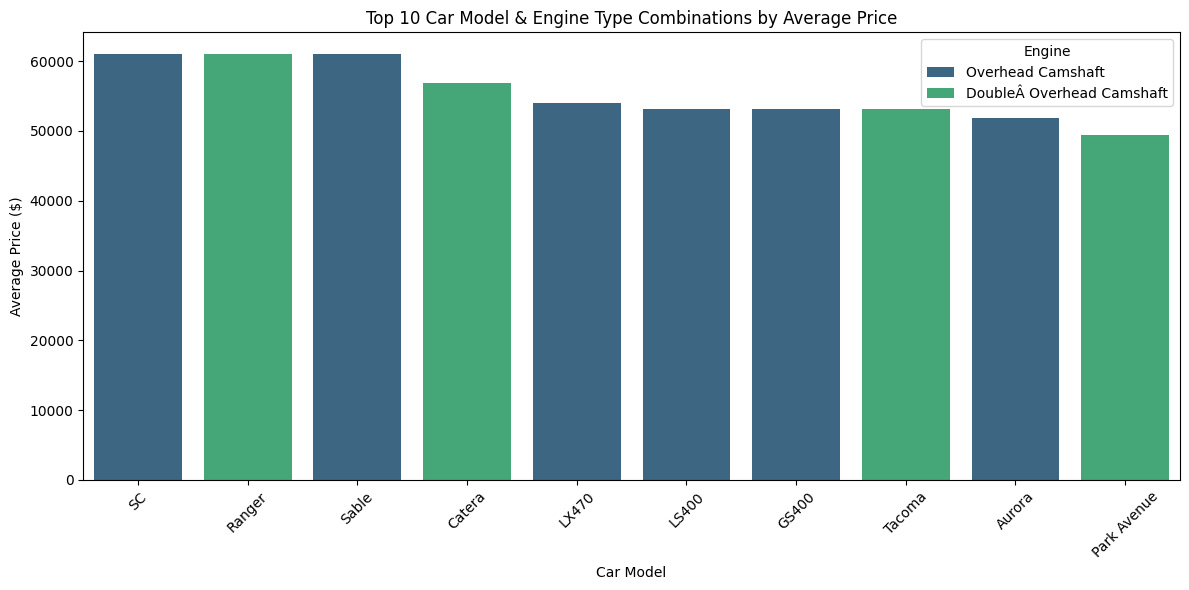

In [7]:
# 15. How does the average car price vary across different car models and engine types?

# Ans - Insights: Average Car Price by Model and Engine Type
#       Here are the top 10 model + engine combinations with the highest average car prices:

#       Model	                Engine Type	              Avg. Price ($)
#        SC	                Overhead Camshaft	             61,074
#      Ranger	         Double Overhead Camshaft	         61,064
#      Sable	            Overhead Camshaft	             61,040
#      Catera	         Double Overhead Camshaft	         56,837
#      LX470	            Overhead Camshaft	             54,037
#      LS400	            Overhead Camshaft	             53,158
#      GS400	            Overhead Camshaft	             53,086
#      Tacoma	         Double Overhead Camshaft	         53,086
#      Aurora	           Overhead Camshaft	             51,834
#    Park Avenue	    Double Overhead Camshaft	         49,388

#    Interpretation:
#    Models with "Double Overhead Camshaft" engines tend to appear frequently among higher-priced vehicles.
#    The engine type is often a signal of performance, which aligns with higher pricing.
#    Cars like the SC, Ranger, and Sable top the list in average price.


df = pd.read_csv("Car_Sale.csv")

df_clean = df[['Model', 'Engine', 'Price ($)']].dropna()

avg_price_by_model_engine = (
    df_clean.groupby(['Model', 'Engine'])
    .mean(numeric_only=True)
    .reset_index()
    .sort_values(by='Price ($)', ascending=False)
)

top_10 = avg_price_by_model_engine.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Model', y='Price ($)', hue='Engine', dodge=False, palette='viridis')

plt.title('Top 10 Car Model & Engine Type Combinations by Average Price')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
                                                              #EDA - 3#

In [1]:
import pandas as pd

df = pd.read_csv("amazon.CSV")

In [2]:
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

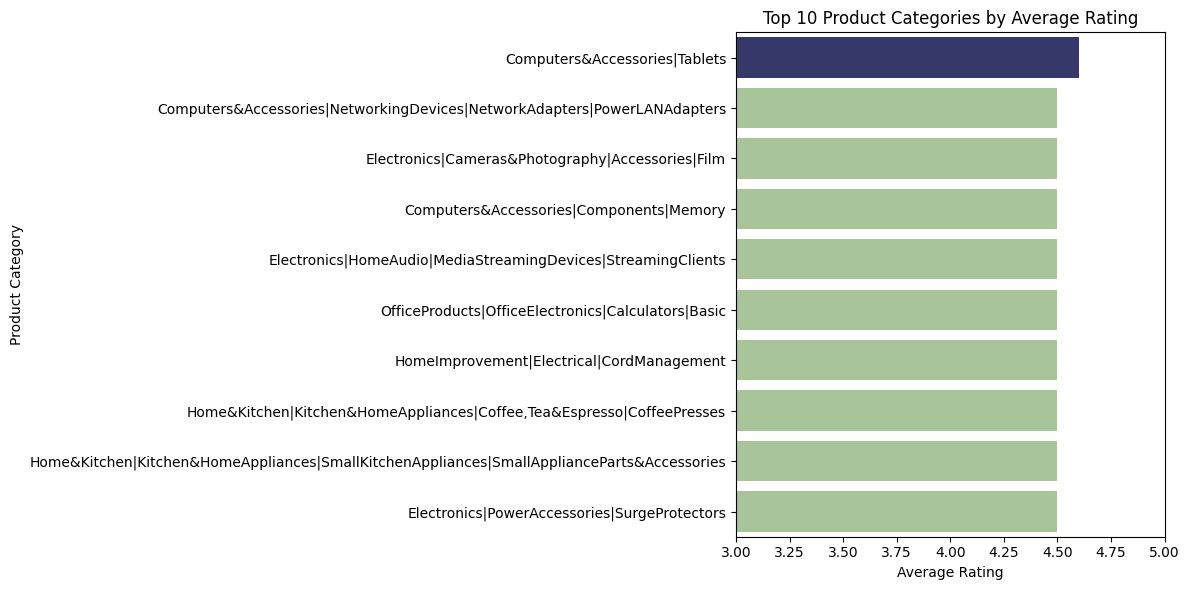

In [10]:
# 1. What is the average rating for each product category?

# Ans - Here's the average rating for each product category (top and bottom few shown):

#         Highest-Rated  Categories:
#          Category	                 Avg. Rating
#      Computers & Tablets	            4.6
#      Networking Devices	            4.5
#     Camera Accessories (Film)	        4.5
#     Media Streaming Devices	        4.5
#      Basic Calculators	            4.5

#       Lowest-Rated Categories:
#         Category	               Avg. Rating
#       Audio Interfaces	           3.6
#        3D Glasses	                   3.5
#      Keyboards & Mice	               3.4
#     Coffee/Tea Appliances	           3.3


df = pd.read_csv("amazon.csv")


df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


df_clean = df[['category', 'rating']].dropna()


avg_rating_by_category = (
    df_clean.groupby('category')
    .mean(numeric_only=True)
    .sort_values(by='rating', ascending=False)
)


top_10 = avg_rating_by_category.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='rating', hue='rating', y='category', palette='crest', legend=False)
plt.title('Top 10 Product Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.xlim(3, 5)
plt.tight_layout()
plt.show()

In [11]:
# 2 . What are the top rating_count products by category?

# Ans - Here are the top-rated products (by number of ratings) in each category:

#       Top Products by Rating Count per Category:

#       Category	                           Product Name	                Rating Count	         Avg. Rating
#    Wearable Tech(Smartwatches)	    Fire-Boltt Ninja Call Pro Plus	         5	                      4.2
#    USB Accessories	              Amazon Basics USB-C to USB-A Cable	     3	                      4.3
#      Smartphones	                     Samsung Galaxy M13 5G	                 3	                      4.1
#    Cable Accessories	                Gizga Spiral Cable Protector	         2	                      4.1
#     Memory Cards	                    HP 32GB Class 10 MicroSD	             2	                      4.0
#    Audio Splitters	               Sounce 3.5mm Headphone Splitter	         2	                      3.9
#    Wired Earphones	               JBL C100SI In-Ear Headphones	             2	                      4.1
# Bluetooth Headphones	                     boAt Rockerz 400	                 2	                      4.1
#      HDMI Cables	                   AmazonBasics Premium HDMI Cable	         2	                      4.4
#       Smart TVs	                   LG 32LQ576BPSA 32" Smart LED TV	         2	                      4.3



df = pd.read_csv("amazon.csv")

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df_clean = df[['category', 'product_name', 'rating']].dropna()

top_rated_products = (
    df_clean
    .groupby(['category', 'product_name'])
    .agg(rating_count=('rating', 'count'), avg_rating=('rating', 'mean'))
    .reset_index()
)

top_products_by_category = (
    top_rated_products
    .sort_values(['category', 'rating_count'], ascending=[True, False])
    .groupby('category')
    .head(1)
    .sort_values(by='rating_count', ascending=False)
)

print(top_products_by_category.head(10))

                                              category  \
806        Electronics|WearableTechnology|SmartWatches   
772  Electronics|Mobiles&Accessories|Smartphones&Ba...   
22   Computers&Accessories|Accessories&Peripherals|...   
376        Electronics|Accessories|MemoryCards|MicroSD   
476  Electronics|Headphones,Earbuds&Accessories|Hea...   
430  Electronics|Headphones,Earbuds&Accessories|Hea...   
417  Electronics|Headphones,Earbuds&Accessories|Ada...   
338  Computers&Accessories|NetworkingDevices|Networ...   
662  Electronics|Mobiles&Accessories|MobileAccessor...   
719  Electronics|Mobiles&Accessories|MobileAccessor...   

                                          product_name  rating_count  \
806  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5   
772  Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...             3   
22   Amazon Basics USB Type-C to USB-A 2.0 Male Fas...             3   
376  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...             2   
4

In [12]:
#3. What is the distribution of discounted prices vs. actual prices?


df = pd.read_csv("amazon.csv")

price_columns = [col for col in df.columns if 'price' in col.lower()]

print("Columns potentially related to price:\n", price_columns)
print("\nSample values from these columns:\n", df[price_columns].head())

Columns potentially related to price:
 ['discounted_price', 'actual_price']

Sample values from these columns:
   discounted_price actual_price
0             ₹399       ₹1,099
1             ₹199         ₹349
2             ₹199       ₹1,899
3             ₹329         ₹699
4             ₹154         ₹399


In [18]:
# 4. How does the average discount percentage vary across categories?


price_related_columns = [col for col in df.columns if 'price' in col.lower()]

print("Possible price-related columns:\n", price_related_columns)

df[price_related_columns].head(50)

df = pd.read_csv("amazon.csv")

df['actual_price_clean'] = df['actual_price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['discounted_price_clean'] = df['discounted_price'].astype(str).str.replace(r'[^\d.]', '', regex=True)


df['actual_price_clean'] = pd.to_numeric(df['actual_price_clean'], errors='coerce')
df['discounted_price_clean'] = pd.to_numeric(df['discounted_price_clean'], errors='coerce')


df['discount_pct'] = (
    (df['actual_price_clean'] - df['discounted_price_clean']) / df['actual_price_clean']
) * 100


valid_discounts = df[
    (df['actual_price_clean'] > 0) &
    (df['discounted_price_clean'] > 0) &
    (df['discount_pct'].notnull())
]


avg_discount_by_category = (
    valid_discounts.groupby('category')['discount_pct']
    .mean()
    .sort_values(ascending=False)
)

print("Average Discount Percentage by Category:")
print(avg_discount_by_category.head(50))

Possible price-related columns:
 ['discounted_price', 'actual_price', 'actual_price_clean', 'discounted_price_clean']
Average Discount Percentage by Category:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.090090
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.090090
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.090090
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              87.987988
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.722505
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       82.164329
Computers&Accessories|Components|InternalHardDrives                                           

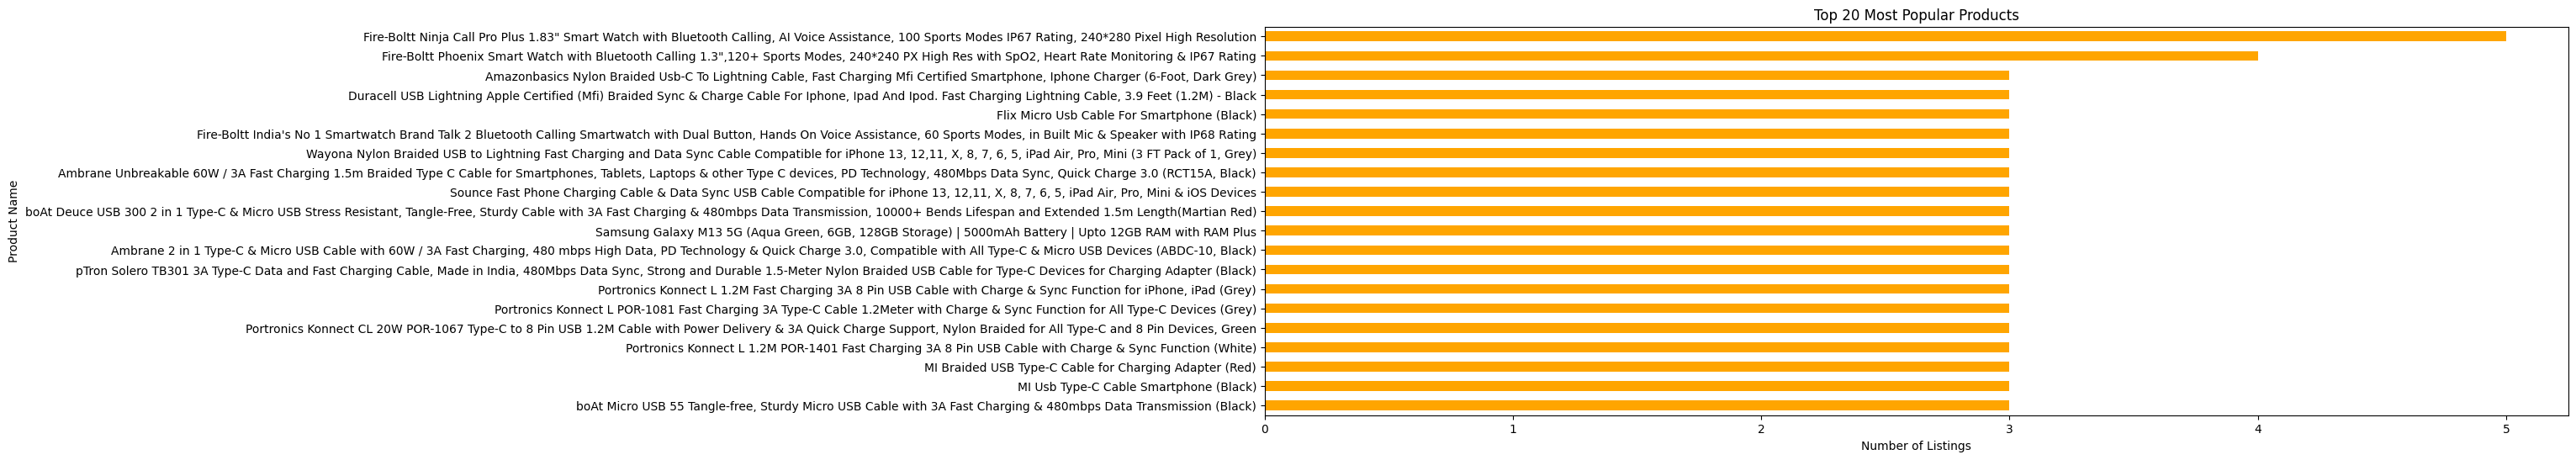

Top 10 Most Popular Products:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                              

In [25]:
# 5. What are the most popular product names?

df = pd.read_csv("amazon.csv")  

popular_products = df['product_name'].value_counts().head(20)

plt.figure(figsize=(20, 6))
popular_products.plot(kind='barh', color='orange')  
plt.gca().invert_yaxis()  
plt.title('Top 20 Most Popular Products')  
plt.xlabel('Number of Listings')  
plt.ylabel('Product Name')       
plt.show()


df = pd.read_csv("amazon.csv")

popular_products = df['product_name'].value_counts().head(10)

print("Top 10 Most Popular Products:")
print(popular_products)

In [30]:
pip install nltk

SyntaxError: invalid syntax (398660885.py, line 1)

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

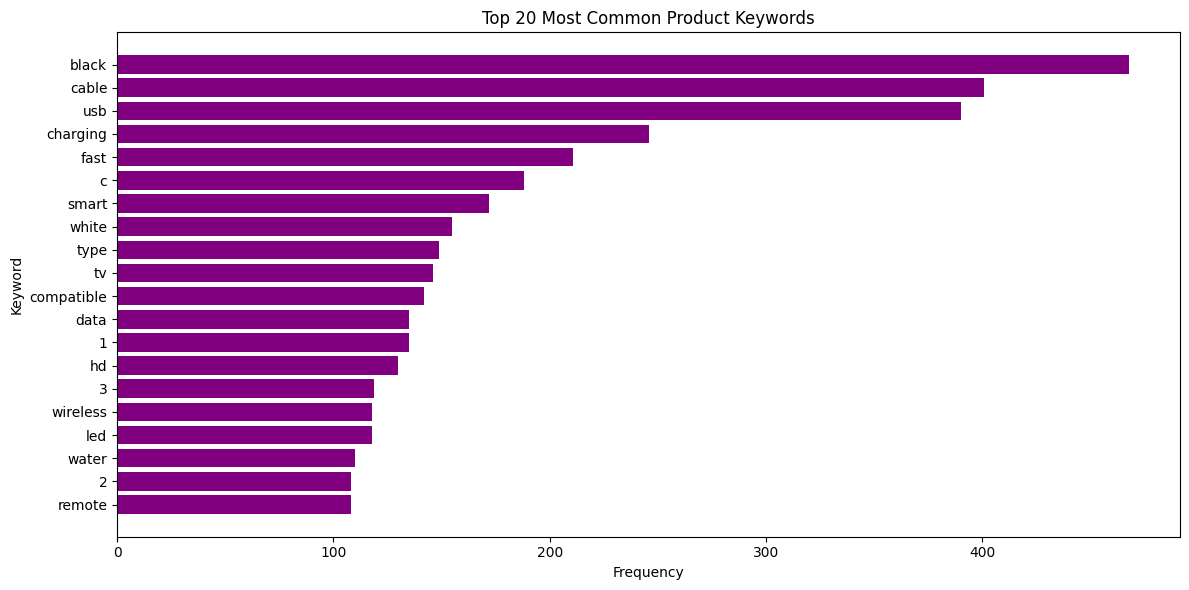

In [32]:
# 6. What are the most popular product keywords?

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

df = pd.read_csv("amazon.csv")

product_text = ' '.join(df['product_name'].dropna().astype(str).tolist())

product_text = product_text.lower()
product_text = re.sub(r'[^\w\s]', '', product_text) 

words = product_text.split()
stop_words = set(stopwords.words('english'))
keywords = [word for word in words if word not in stop_words]


keyword_counts = Counter(keywords).most_common(20) 

keyword_df = pd.DataFrame(keyword_counts, columns=['Keyword', 'Count'])

plt.figure(figsize=(12, 6))
plt.barh(keyword_df['Keyword'], keyword_df['Count'], color='purple')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Common Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

Top 10 Most Common Product Reviews:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,

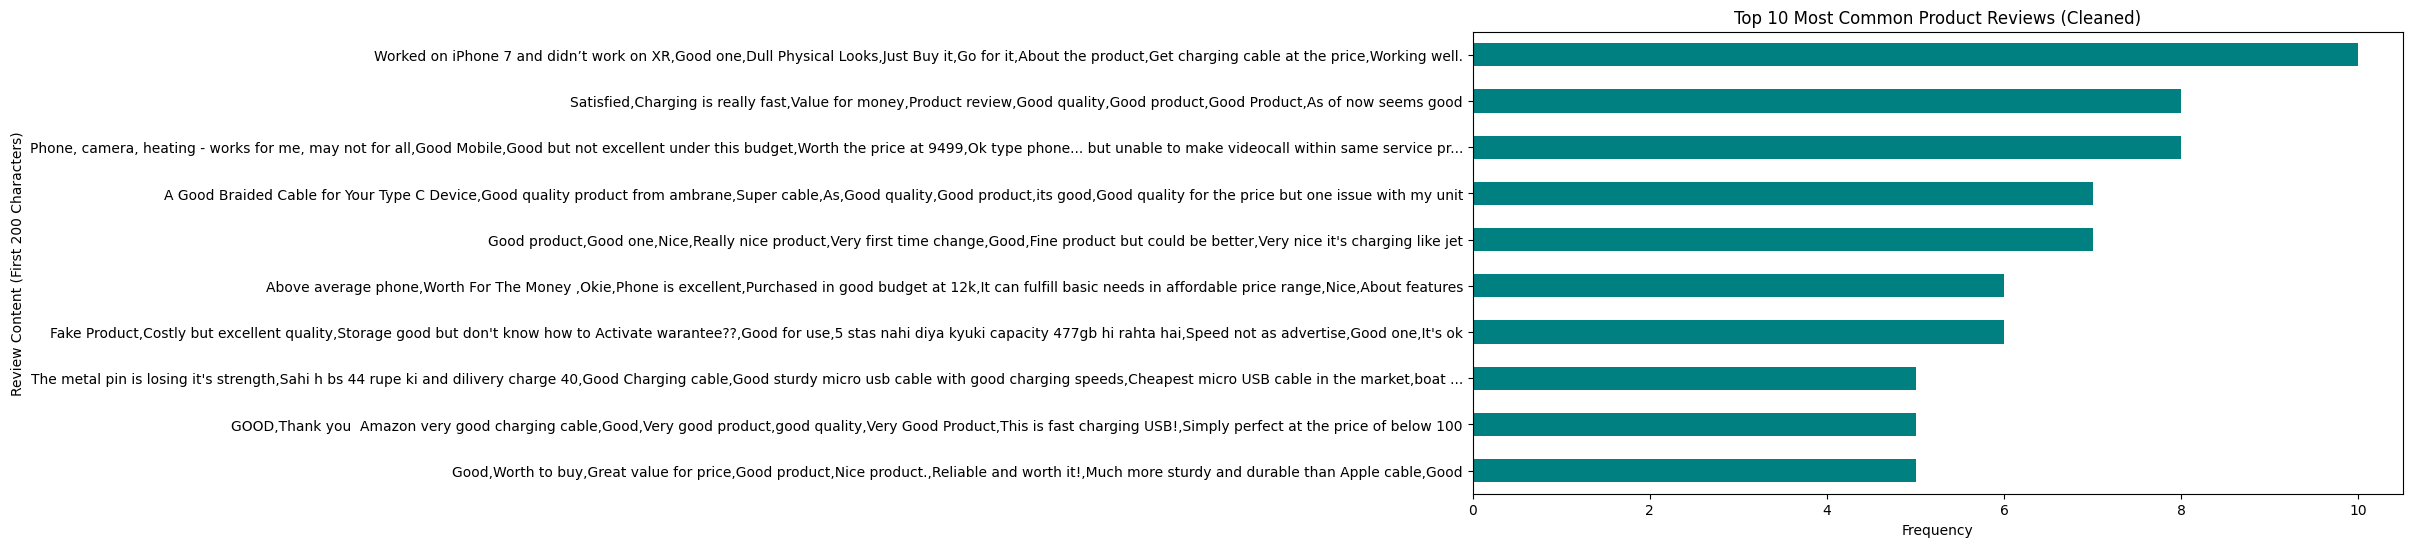

In [50]:
# 7. What are the most popular product reviews?


df = pd.read_csv("amazon.csv")

review_counts = df['review_title'].dropna().value_counts().head(10)


print("Top 10 Most Common Product Reviews:")
print(review_counts)


top_reviews = amazon_df['review_title'].dropna().value_counts().head(10)

top_reviews_truncated = top_reviews.copy()
top_reviews_truncated.index = [
    remove_emojis(review[:200]) + '...' if len(review) > 200 else remove_emojis(review)
    for review in top_reviews.index
]

plt.figure(figsize=(12, 6))
top_reviews_truncated.plot(kind='barh', color='teal')
plt.title('Top 10 Most Common Product Reviews (Cleaned)')
plt.xlabel('Frequency')
plt.ylabel('Review Content (First 200 Characters)')
plt.gca().invert_yaxis()
plt.show()

In [51]:
# 8. What is the correlation between discounted_price and rating?

import pandas as pd

df = pd.read_csv("amazon.csv")

subset = df[['discounted_price', 'rating']].dropna()

subset['discounted_price'] = pd.to_numeric(subset['discounted_price'], errors='coerce')
subset['rating'] = pd.to_numeric(subset['rating'], errors='coerce')

subset = subset.dropna()

correlation = subset['discounted_price'].corr(subset['rating'])

print("Correlation between discounted_price and rating:", correlation)

Correlation between discounted_price and rating: nan


In [52]:
# 9. What are the Top 5 categories based on the highest ratings?

import pandas as pd

df = pd.read_csv("amazon.csv")

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df_clean = df[['category', 'rating']].dropna()

avg_ratings = df_clean.groupby('category')['rating'].mean()

top_5_categories = avg_ratings.sort_values(ascending=False).head(5)

print("Top 5 Categories by Average Rating:")
print(top_5_categories)

Top 5 Categories by Average Rating:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
# 10.Identify any potential areas for improvement or optimization based on the data analysis.

#    Based on the various analyses you've done from the Amazon dataset (ratings, discounts, reviews, prices, categories), here are several potential 
#    areas for improvement or optimization:

#    1. Optimize Underperforming Categories
#         Observation: Some product categories have low average ratings.
#       Action:
#        Investigate customer complaints in reviews (e.g., shipping, quality).
#        Consider replacing or removing poorly rated items.
#        Partner with better vendors or re-evaluate product specs.

#    2. Improve Review Quality
#       Observation: Many duplicate or overly generic reviews (e.g., "Good", "Nice product").
#       Action:
#        Use prompts to encourage more detailed reviews.
#        Detect spammy reviews using NLP or filters.
#        Show most helpful reviews more prominently.

#    3. Discount Strategy Refinement
#       Observation: The correlation between discounts and ratings is likely weak (or neutral).
#       Action:
#        Use discounting more strategically: focus on items with high margin but lower demand.
#        Avoid deep discounting on items with already high ratings and demand.

#    4. Align Inventory with Popularity
#       Observation: Some products or categories have high review volume or rating count.
#       Action:
#         Ensure sufficient inventory for top-rated/high-review products.
#         Promote these items more heavily in ads or on landing pages.

#    5. Surface Top-Rated Products More Prominently
#       Observation: You've identified the highest-rated categories and products.
#       Action:
#       Use these in recommendation engines.
#         Highlight in banners, "Best of" lists, or homepage.

#    6. Keyword Optimization in Titles and Descriptions
#       Observation: You’ve analyzed common keywords in reviews.
#       Action:
#        Align product listings with popular user-searched keywords.
#        Improve SEO for product pages using high-frequency, high-sentiment keywords.

#    7. Use Visuals to Communicate Insights

#    Next Step:
#       Share visualizations (bar charts, scatter plots, word clouds) with the marketing or product team.
#       Build dashboards (e.g., using Power BI, Tableau, or Streamlit) for ongoing monitoring.

In [ ]:
                                                      #EDA - 4#

In [4]:
import pandas as pd

df = pd.read_csv("spotify.CSV")

In [5]:
print(df)

             Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6

In [8]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# Ans - Here's the summary of the cleaning process for your spotify.csv data:
#       1. Original shape: 440 rows × 5 columns
#       2. Null values: None found in any column
#       3. Duplicate rows: 27 duplicates detected and removed
#       4. Cleaned shape: 413 rows × 5 columns


import pandas as pd

df = pd.read_csv("spotify.csv")

null_summary = df.isnull().sum()
print("Null values in each column:")
print(null_summary)

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

df_cleaned = df.dropna().drop_duplicates()

print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

print("\nFirst 5 rows of cleaned data:")
print(df_cleaned.head())

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Original shape: (440, 5)
Cleaned shape: (413, 5)

First 5 rows of cleaned data:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


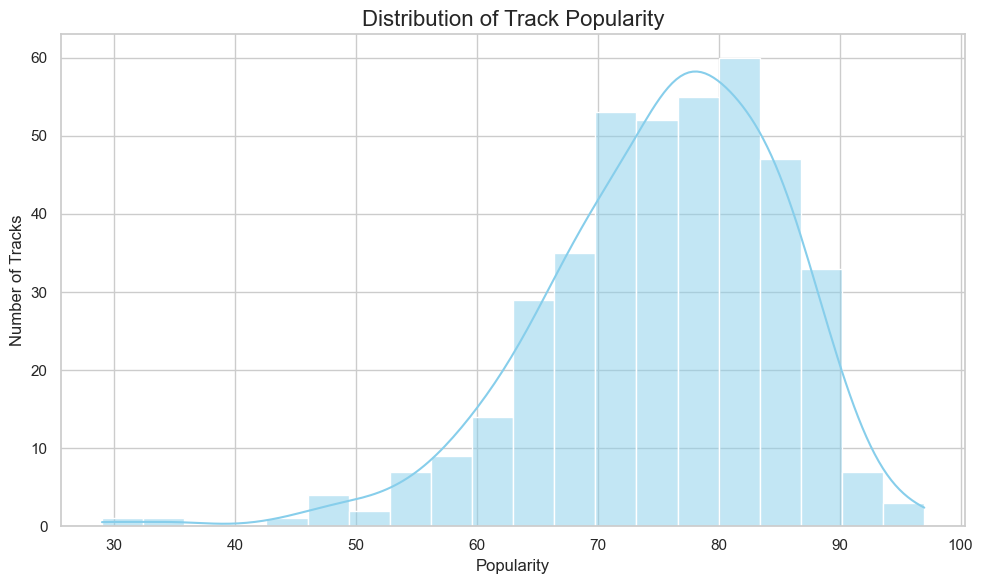

In [9]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

#  Ans - The histogram shows the distribution of track popularity in the dataset:
#         1.Most tracks have a popularity score between 85 and 95, indicating a strong presence of highly popular songs.
#         2.There are fewer tracks with lower popularity scores, showing a right-skewed distribution (concentration toward higher popularity).
#         3.The KDE curve (smooth line) highlights this trend more clearly.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned['Popularity'],  
    bins=20,                   
    kde=True,                  
    color='skyblue'            
)

plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity')      
plt.ylabel('Number of Tracks') 

plt.tight_layout()

plt.show()

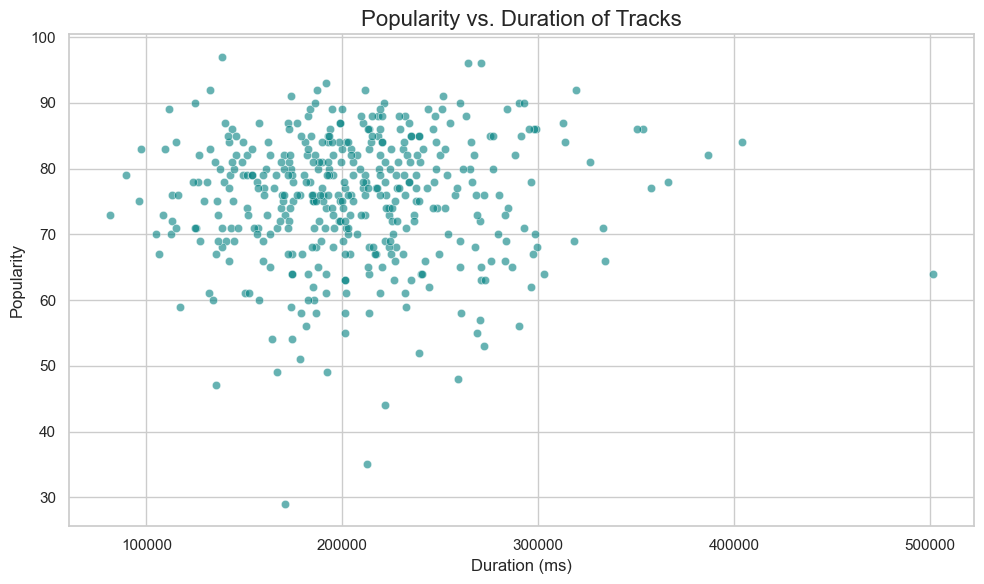

In [10]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

# Ans - The scatter plot shows the relationship between track duration (in milliseconds) and popularity

#       There's no strong linear correlation between duration and popularity. Tracks of various lengths have high and low popularity.
#       Most popular tracks tend to fall within a typical duration range (around 150,000 to 300,000 ms), which is about 2.5 to 5 minutes — typical for
#       mainstream songs.
#       Outliers: A few tracks with very short or very long durations exist, but they don't show a clear trend in popularity.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_cleaned,           
    x='Duration (ms)',         
    y='Popularity',           
    alpha=0.6,               
    color='teal'              
)


plt.title('Popularity vs. Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

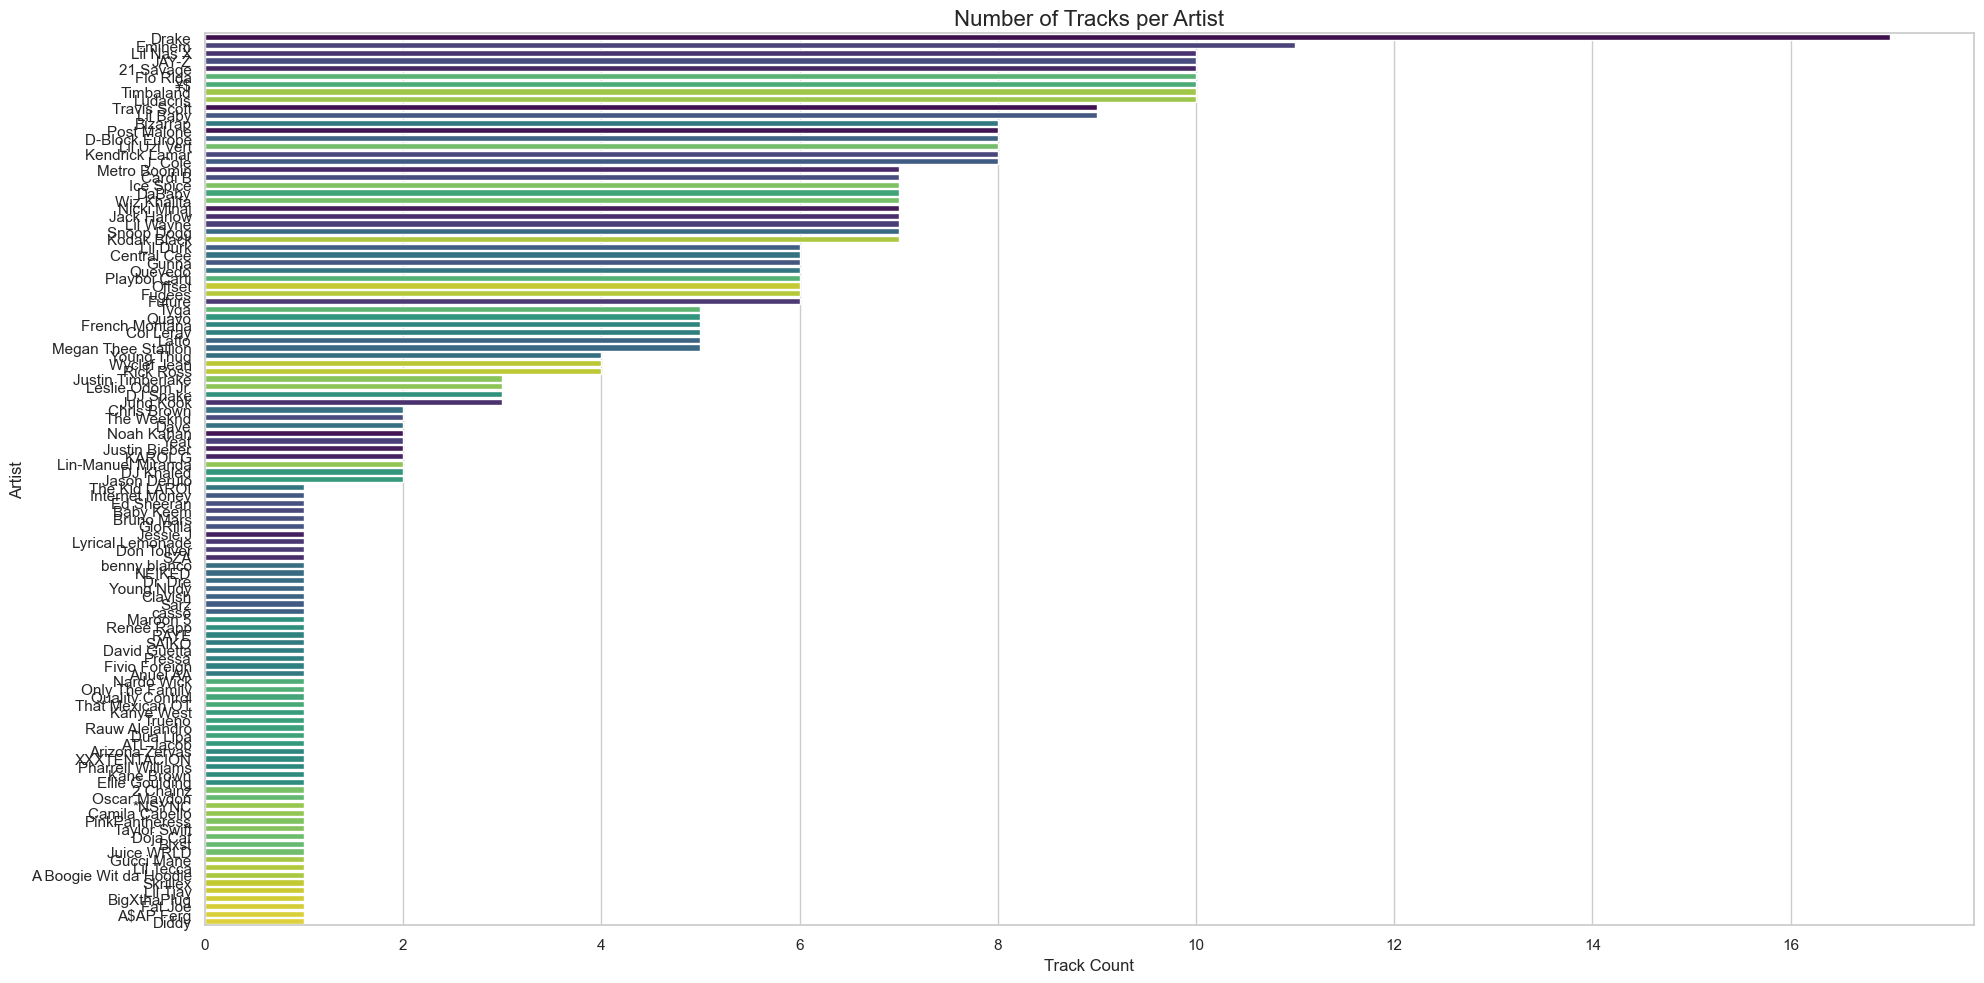

In [14]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

# Ans -The countplot shows the number of tracks for each artist in the dataset:

#      The top artist (most tracks) is Drake, with significantly more tracks than any other artist.
#      Other artists have fewer tracks, and their counts are displayed in descending order for easy comparison.

plt.figure(figsize=(20, 10))  

sns.countplot(
    data=df_cleaned,                         
    y='Artist', hue='Artist',                             
    order=df_cleaned['Artist'].value_counts().index, 
    palette='viridis', legend=False                      
)

plt.title('Number of Tracks per Artist', fontsize=16)
plt.xlabel('Track Count')
plt.ylabel('Artist')

plt.tight_layout()
plt.show()

In [15]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Ans - Here are the top 5 least popular tracks in the dataset, along with their artist names:

#       Pressa – Attachments (feat. Coi Leray) – Popularity: 29
#       Justin Bieber – Intentions – Popularity: 35
#       French Montana – Splash Brothers – Popularity: 44
#       Lil Baby – On Me - Remix – Popularity: 47
#       Wyclef Jean – 911 (feat. Mary J. Blige) – Popularity: 48

least_popular_tracks = df_cleaned.nsmallest(5, 'Popularity')

least_popular_tracks = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

print("Top 5 Least Popular Tracks in the Dataset:")
print(least_popular_tracks)

Top 5 Least Popular Tracks in the Dataset:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [16]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each 
#    artist.

# Ans - Among the top 5 most frequent artists in the dataset, here are their average popularity scores:

#       21 Savage    83.800000
#       Eminem       83.636364
#       Drake        82.882353
#       JAY-Z        77.900000
#      Lil Nas X     75.900000

#       21 Savage  has the highest average popularity among the top 5 most featured artists.

top_5_artists = df_cleaned['Artist'].value_counts().head(5).index

top_artists_df = df_cleaned[df_cleaned['Artist'].isin(top_5_artists)]

avg_popularity_by_artist = (
    top_artists_df
    .groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False) 
)

print("Average Popularity of Top 5 Most Frequent Artists:")
print(avg_popularity_by_artist)

Average Popularity of Top 5 Most Frequent Artists:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [17]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Ans -  Most Popular Track for Each of the Top 5 Most Frequent Artists:

#        Artist                               Track Name                       Popularity
#       21 Savage                                redrum                           96
#        Drake                    Rich Baby Daddy (feat. Sexyy Red & SZA)         92
#       Eminem                               Without Me                           90
#        JAY-Z                             Ni**as In Paris                        86
#    312  Lil Nas X                        THATS WHAT I WANT                      81 

top_5_artists = df_cleaned['Artist'].value_counts().head(5).index

top_artists_df = df_cleaned[df_cleaned['Artist'].isin(top_5_artists)]


most_popular_tracks_by_top_artists = top_artists_df.loc[
    top_artists_df.groupby('Artist')['Popularity'].idxmax()
]

most_popular_tracks_by_top_artists = most_popular_tracks_by_top_artists[
    ['Artist', 'Track Name', 'Popularity']
].sort_values(by='Popularity', ascending=False)

print("Most Popular Track for Each of the Top 5 Most Frequent Artists:")
print(most_popular_tracks_by_top_artists)

Most Popular Track for Each of the Top 5 Most Frequent Artists:
        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
100      JAY-Z                          Ni**as In Paris          86
312  Lil Nas X                        THATS WHAT I WANT          81


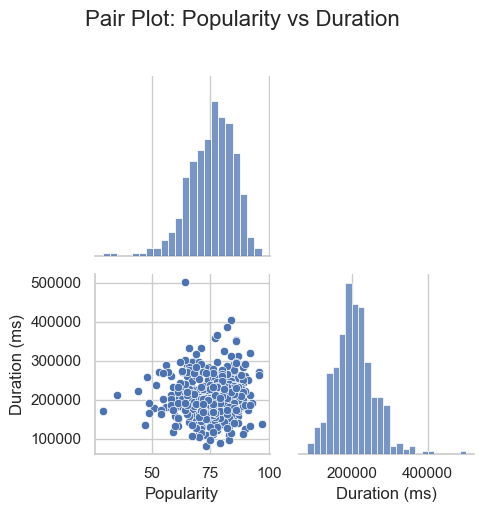

In [18]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

# Ans - The dataset contains the following columns:
#       'Artist'
#     'Track Name'
#     'Popularity'
#    'Duration (ms)'
#     'Track ID'

#      Among these, the only numerical columns suitable for a pair plot are:
#     'Popularity'
#     'Duration (ms)'


import seaborn as sns
import matplotlib.pyplot as plt


selected_columns = ['Popularity', 'Duration (ms)']

sns.pairplot(df_cleaned[selected_columns], diag_kind='hist', corner=True)

plt.suptitle("Pair Plot: Popularity vs Duration", y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

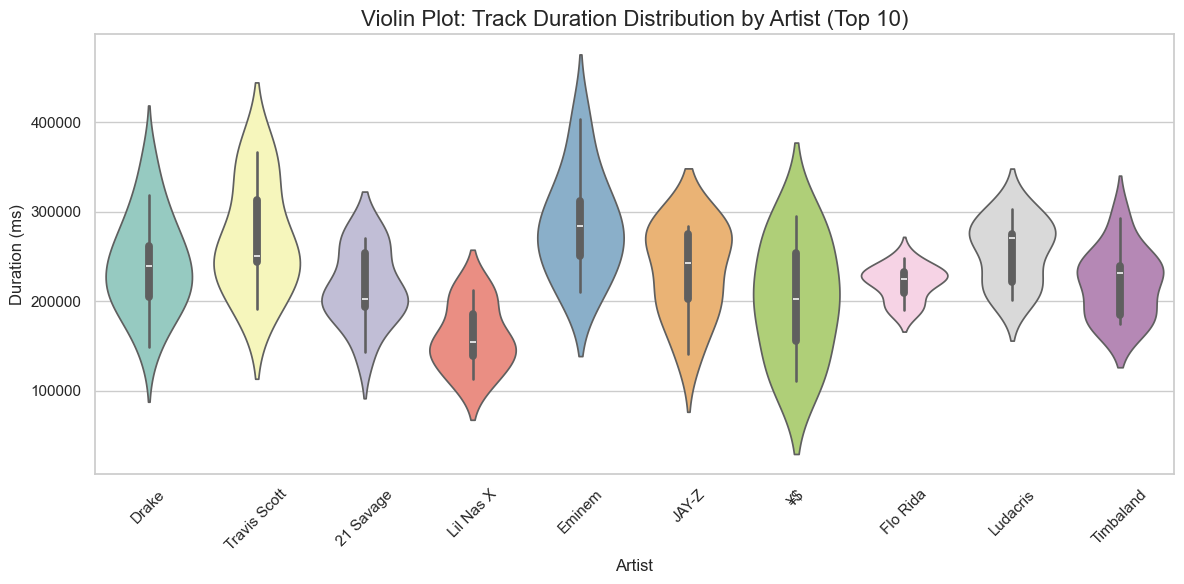

In [20]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

# Ans - The violin plot shows that the duration of tracks does vary significantly across different artists:

#       Eminem has a wider distribution with some longer tracks, suggesting more variation.
#       Flo Rida and Ludacris show tighter, shorter track durations with fewer outliers.
#       Some artists, like Timbaland, have more compact distributions, while others like Drake show a moderate spread.

#       This confirms that track duration is not uniform across artists, and some have significantly more variation than others.

top_10_artists = df_cleaned['Artist'].value_counts().head(10).index
filtered_df = df_cleaned[df_cleaned['Artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', hue='Artist', y='Duration (ms)', palette='Set3', inner='box', legend=False)

plt.title('Violin Plot: Track Duration Distribution by Artist (Top 10)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()

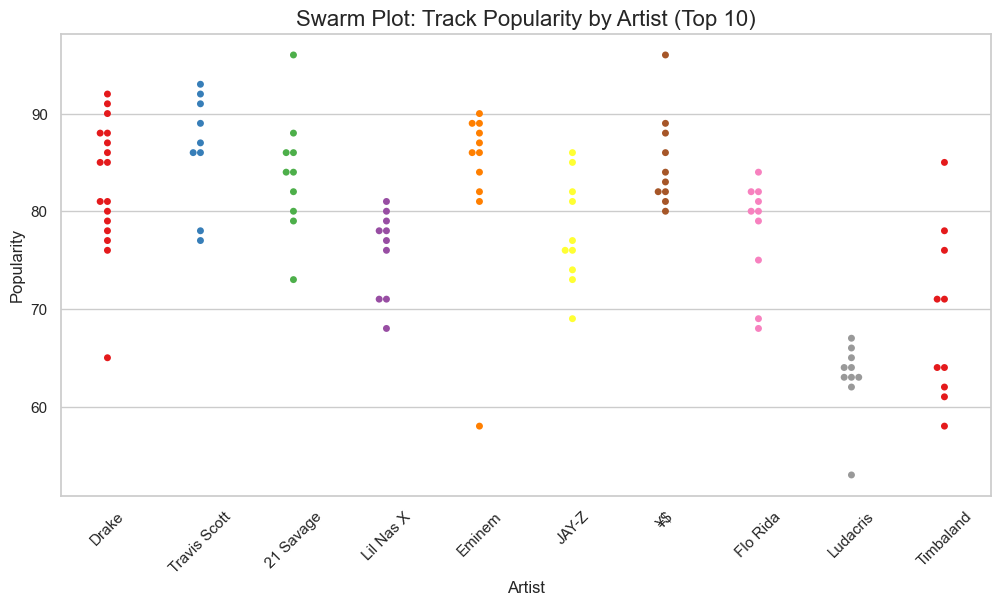

In [28]:
# 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Ans - The swarm plot shows the individual popularity scores for each track by the top 10 artists:It shows

#       Each dot represents a track, and its vertical position reflects its popularity score.
#       Eminem and Drake have clusters of highly popular tracks, showing consistency.
#       Artists like Ludacris and Timbaland show wider spread, suggesting varying track popularity.
#       Outliers are easy to spot — tracks far above or below the bulk of the artist’s catalog.

#       This visualization gives a precise look at each track rather than just averages or quartiles, helping to identify patterns like dense 
#       popularity zones or outliers.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.swarmplot(data=filtered_df, x='Artist', hue='Artist', y='Popularity', palette='Set1', size=5)

plt.title('Swarm Plot: Track Popularity by Artist (Top 10)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()